# <center>Exploring the Dynamic Realm of India's Startup Ecosystem</center>


## 1 Business Understanding

### 1.1 Background

The Indian start-up ecosystem has witnessed remarkable growth and gained significant attention in recent years. Funding plays a pivotal role in driving the growth and success of start-ups, enabling them to scale their operations, foster innovation, and create a lasting impact. Therefore, the aim of this "Indian Start-up Funding Analysis" project is to gain a comprehensive understanding of the funding landscape for start-ups in India from 2018 to 2021. By analyzing the funding data, the project seeks to uncover trends, patterns, and factors influencing start-up funding in India. 

 ### 1.2 Business Objective
 
 The objective includes evaluating and leveraging the thriving indian startup ecosystem and the impact of funding on start-up success, identifying sectors attracting the most investment, and providing actionable insights for stakeholders. The analysis will focus on the distribution of funding amounts and stages of funding reached.The goal of this analysis is to determine the most effective approach for investment. The project also aims to empower stakeholders with knowledge and insights to navigate the Indian start-up ecosystem effectively. 

### 1.3 Hypothesis


**Null Hypothesis (H0):** There are no significant differences in the funding amounts among the top 10 sectors.

**Alternative Hypothesis (H1):** There are significant differences in the funding amounts among the top 10 sectors.





 ### Questions

a) What are the overall funding trends in the Indian start-up ecosystem during the analyzed period?

b) Which sectors attracted the most funding and experienced the highest growth?

c) Which sectors attracted the most funding and experienced the highest growth?

d) Who are the top 10 investors in the Indian start-up ecosystem?

e) Which Top 10 cities have attracted the highest total funding amounts for start-ups?

f)Has there been any change in the distribution of headquarters locations over the analyzed period?



## 2 Data Understanding

### 2.1 Resources availability 
Data for this project

In this project, the dataset resides in 3 places. For ease of access and security we have made the datasets available there in the GitHub Repository 

- First Data Set

The data for 2020 and 2021 where extracted from a database.

- Second Data Set

The data for 2019 was found in OneDrive.

- Third Data Set

The third part of the data (data for 2018) is hosted on a GitHub Repository in a file called startup_funding2018.csv.



### 2.2 Column names and description

Company/Brand: Name of the company/start-up

Founded: Year start-up was founded

Sector: Sector of service

What it does: Description about Company

Founders: Founders of the Company

Investor: Investors

Amount($): Raised fund

Stage: Round of funding reached
Data for this project


### Install required packages

In [1]:
#Import all the necessary packages
import pyodbc 
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import warnings 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
#to set the display of floats: 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from scipy.stats import shapiro, anderson, kstest
from scipy.stats import levene
from scipy.stats import kruskal
from scipy import stats
warnings.filterwarnings('ignore')

### Create a connection by accessing connection string with defined environment variables


In [2]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


In [3]:
# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
# Use the connect method of the pyodbc library and pass in the connection string.
connection = pyodbc.connect(connection_string)

In [5]:
# Now the sql query to get the data is what what you see below. 
query = "Select * from dbo.LP1_startup_funding2020"
query1 = "Select * from dbo.LP1_startup_funding2021"

## 3 Data Preparation

## Data Loading

In [6]:
data=pd.read_sql(query, connection)
data1=pd.read_sql(query1, connection)
data2=pd.read_csv("startup_funding2018.csv")
data3=pd.read_csv("startup_funding2019.csv")

A new column named year will be added to each of the dataset to help us know the year each row represents

In [7]:
data["Year"]=2020
data1["Year"]=2021
data2["Year"]=2018
data3["Year"]=2019

## Exploratory Data Analysis

Here we will analyze and investigate data sets and summarize their characteristics by using data visualization,
also since we will concatenate all the data sets after cleaning we will  rename the colums after cleaning each dataset

## 2020 EDA

In [8]:
#view first five columns
data.head()


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,Year
0,Aqgromalin,2019.00,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.00,None,None,2020
1,Krayonnz,2019.00,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.00,Pre-seed,None,2020
2,PadCare Labs,2018.00,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.00,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.00,None,None,2020
4,Gramophone,2016.00,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.00,None,None,2020


In [9]:
#General info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
 10  Year           1055 non-null   int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 90.8+ KB


In [10]:
#check for number of unique values each column has
data.nunique()

Company_Brand    905
Founded           26
HeadQuarter       77
Sector           302
What_it_does     990
Founders         927
Investor         848
Amount           300
Stage             42
column10           2
Year               1
dtype: int64

In [11]:
#view number of missing values
data.isnull().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
Year                0
dtype: int64

In [12]:
#view number of rows and columns in the dataset
data.shape

(1055, 11)

## 2021  EDA


In [13]:
#view the first five columns
data1.head()


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Year
0,Unbox Robotics,2019.00,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.00,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012.00,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.00,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.00,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021


In [14]:
#general info
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
 9   Year           1209 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 94.6+ KB


In [15]:
#view the number of null or missing values in the data
data1.isnull().sum()


Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
Year               0
dtype: int64

In [16]:
#check number of unique values in columns
data1.nunique()


Company_Brand    1033
Founded            30
HeadQuarter        70
Sector            254
What_it_does     1143
Founders         1095
Investor          937
Amount            278
Stage              31
Year                1
dtype: int64

In [17]:
#view the number of rows and columns in the dataset
data1.shape

(1209, 10)

## 2018 Dataset EDA


In [18]:
#view the first five columns
data2.head()


,Company Name,Industry,Round/Series,Amount,Location,About Company,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018


In [19]:
#general info
data2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
 6   Year           526 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 28.9+ KB


In [20]:
#view the null and missing values in the dataset
data2.isnull().sum()


Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
Year             0
dtype: int64

In [21]:
#check number of unique values in each column
data2.nunique()


Company Name     525
Industry         405
Round/Series      21
Amount           198
Location          50
About Company    524
Year               1
dtype: int64

In [22]:
#view the number of rows and columns in the dataset
data2.shape

(526, 7)

## 2019 Dataset EDA


In [23]:
#view the first five columns
data3.head()


,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.00,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.00,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.00,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019


In [24]:
#general info
data3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
 9   Year           89 non-null     int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 7.1+ KB


In [25]:
#view the null and missing values in the dataset
data3.isnull().sum()


Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
Year              0
dtype: int64

In [26]:
#check number of unique values in each column
data3.nunique()


Company/Brand    87
Founded          12
HeadQuarter      17
Sector           52
What it does     88
Founders         85
Investor         86
Amount($)        50
Stage            15
Year              1
dtype: int64

In [27]:
#view the number of rows and columns in the dataset
data3.shape

(89, 10)

### Observation on the dataset

* The 2018 dataset is missing 3 columns 
* The 2020 dataset has an additional column named column 10 which will be analysed to see it's content
* The datatype of the amount column in 2021,2018 and 2019 is in object
* 2018 dataset has no missing values in any of the columns


These issues noticed will be analysed and solved when cleaning the data

## Error Checking

* Each column in all the datsets will be thoroughly inspected to check for inconsistencies and variations
* Duplicates will be removed from each dataset
* Datatypes will be checked 

## 2020 Dataset Cleaning


In [28]:
#check duplicates 
data.duplicated().sum()

3

In [29]:
#remove duplicates
data.drop_duplicates(inplace=True)

In [30]:
#check duplicates removed
data.duplicated().sum()

0

In [31]:
#View the maximum rows in the data set
pd.set_option("display.max_rows",None)

#### Now we are done with removing duplicated data we proceed to cleaning the data set by checking columns for error

In [32]:
#view the company brand column to check for errors
data["Company_Brand"]

0                                  Aqgromalin
1                                    Krayonnz
2                                PadCare Labs
3                                       NCOME
4                                  Gramophone
5                                      qZense
6                                MyClassboard
7                                       Metvy
8                                      Rupeek
9                                   Gig India
10                                Slurrp Farm
11                                     Medfin
12                                    MasterG
13                                   Brila 91
14                                 FoodyBuddy
15                                     Zomato
16                                  OurEye.ai
17                                 Shiprocket
18                                  Pine Labs
19                          Moneyboxx Finance
20                                       EWar
21                         SucSEED

#### Notes on the company_brand column for 2020


* The companies website was attached the name of the company

In [33]:
#we noticed the company was the first index so we took it and split it from the comapny site
data["Company_Brand"]=data["Company_Brand"].str.split("[/.]").str[0]


In [34]:
#view the company brand column after making changes and using the company name
data["Company_Brand"]

0                                  Aqgromalin
1                                    Krayonnz
2                                PadCare Labs
3                                       NCOME
4                                  Gramophone
5                                      qZense
6                                MyClassboard
7                                       Metvy
8                                      Rupeek
9                                   Gig India
10                                Slurrp Farm
11                                     Medfin
12                                    MasterG
13                                   Brila 91
14                                 FoodyBuddy
15                                     Zomato
16                                     OurEye
17                                 Shiprocket
18                                  Pine Labs
19                          Moneyboxx Finance
20                                       EWar
21                         SucSEED

In [35]:
### since the errors have been corrected in the company band column we move to the next column

In [36]:
#View the founded column to check for any errors
data["Founded"]

0      2019.00
1      2019.00
2      2018.00
3      2020.00
4      2016.00
5      2019.00
6      2008.00
7      2018.00
8      2015.00
9      2017.00
10     2016.00
11     2017.00
12     2015.00
13     2014.00
14     2015.00
15     2008.00
16     2020.00
17     2017.00
18     1998.00
19     2019.00
20     2019.00
21     2016.00
22     2019.00
23     2016.00
24     2018.00
25     2017.00
26     2016.00
27     2007.00
28     2020.00
29     2011.00
30     1982.00
31     2015.00
32     2015.00
33     2018.00
34     2016.00
35     2016.00
36     2013.00
37     2019.00
38     2016.00
39     2008.00
40     2016.00
41     2017.00
42     2011.00
43     2019.00
44     2020.00
45     2017.00
46     2015.00
47     2020.00
48     2015.00
49     2016.00
50     2015.00
51     2017.00
52     2020.00
53     2016.00
54     2019.00
55     2019.00
56     2009.00
57     2020.00
58     2014.00
59     2014.00
60     2015.00
61     2014.00
62     2019.00
63     2017.00
64     2016.00
65     2019.00
66     201

In [37]:
### No errors where found in the founded column so we move to the next column

In [38]:
#view the headquarter column for errors 
data["HeadQuarter"]

0                                                 Chennai
1                                               Bangalore
2                                                    Pune
3                                               New Delhi
4                                                  Indore
5                                               Bangalore
6                                               Hyderabad
7                                                 Gurgaon
8                                               Bangalore
9                                                    Pune
10                                                Gurgaon
11                                              Bangalore
12                                              New Delhi
13                                              New Delhi
14                                                Belgaum
15                                                Gurgaon
16                                              Bangalore
17            

#### Notes of HeadQuarter column

* In the headquarters column we noticed the headqauarters where attached to their countries and we took the first index
* From research we noticed the offical name of bangalore is bengaluru so we changed it
* From research we noticed the offical name of Gurgaon is Gurugram so we changed it

In [39]:
#takes the fist index of the Headquarter column
data["HeadQuarter"]=data["HeadQuarter"].str.split(",").str[0]

In [40]:
#view the headquarter column after the countries were removed
data["HeadQuarter"]

0                      Chennai
1                    Bangalore
2                         Pune
3                    New Delhi
4                       Indore
5                    Bangalore
6                    Hyderabad
7                      Gurgaon
8                    Bangalore
9                         Pune
10                     Gurgaon
11                   Bangalore
12                   New Delhi
13                   New Delhi
14                     Belgaum
15                     Gurgaon
16                   Bangalore
17                   New Delhi
18                       Noida
19                   New Delhi
20                   Bangalore
21                   Hyderabad
22                      Mumbai
23                   Bangalore
24                     Gurgaon
25                      Mumbai
26                   Bangalore
27                   Bangalore
28                   Bangalore
29                     Gurgaon
30                       Noida
31                   New Delhi
32      

In [41]:
#replaces Bangalore with Bengaluru
data["HeadQuarter"].replace("Bangalore","Bengaluru",inplace=True)

In [42]:
#replaces Gurgaon with Gurugram
data["HeadQuarter"].replace("Gurgaon","Gurugram",inplace=True)

In [43]:
#we noticed a spelling error in the headquarter column
data["HeadQuarter"].iloc[366]

'San Franciscao'

In [44]:
#corrected the spelling error
data.replace("San Franciscao","San Francisco",inplace=True)

In [45]:
#check to see if the changes were effective
data["HeadQuarter"].iloc[366]

'San Francisco'

In [46]:
#view heaquarter columm after correcting errors
data["HeadQuarter"]

0                      Chennai
1                    Bengaluru
2                         Pune
3                    New Delhi
4                       Indore
5                    Bengaluru
6                    Hyderabad
7                     Gurugram
8                    Bengaluru
9                         Pune
10                    Gurugram
11                   Bengaluru
12                   New Delhi
13                   New Delhi
14                     Belgaum
15                    Gurugram
16                   Bengaluru
17                   New Delhi
18                       Noida
19                   New Delhi
20                   Bengaluru
21                   Hyderabad
22                      Mumbai
23                   Bengaluru
24                    Gurugram
25                      Mumbai
26                   Bengaluru
27                   Bengaluru
28                   Bengaluru
29                    Gurugram
30                       Noida
31                   New Delhi
32      

In [47]:
### We move to the next column since all the errors in the HeadQuarter column has been corrected

In [48]:
#view the sector column for errors
data["Sector"]

0                                 AgriTech
1                                   EdTech
2                       Hygiene management
3                                   Escrow
4                                 AgriTech
5                                 AgriTech
6                                   EdTech
7                      Networking platform
8                                  FinTech
9                            Crowdsourcing
10                        Food & Bevarages
11                              HealthTech
12                         Fashion startup
13                        Food & Bevarages
14                           Food Industry
15                           Food Delivery
16                Virtual auditing startup
17                              E-commerce
18                                 FinTech
19                                 FinTech
20                                  Gaming
21                                 FinTech
22                                 FinTech
23         

#### Notes on the sector column

* Some values in the sector column were swapped
* Noticed sectors have subsectors attached so we took the first index
* Corrected some spellings mistake in the sector to make the sectors uniform 

In [49]:
#row with swapped sector value
data.iloc[44]

Company_Brand                      PointOne Capital
Founded                                     2020.00
HeadQuarter                               Bengaluru
Sector                           Venture capitalist
What_it_does     Pre-seed/Seed focussed VC investor
Founders                                  Mihir Jha
Investor                                       None
Amount                                          NaN
Stage                                          None
column10                                       None
Year                                           2020
Name: 44, dtype: object

In [50]:
#To correct the error and put the values in the right cloumns
data['Sector'].iloc[44],data['Investor'].iloc[44]= data['Investor'].iloc[44],data['Sector'].iloc[44]
data['What_it_does'].iloc[44],data['Stage'].iloc[44]=data['Stage'].iloc[44],data['What_it_does'].iloc[44]

In [51]:
#view to see if error was corrected
data.iloc[44]

Company_Brand                      PointOne Capital
Founded                                     2020.00
HeadQuarter                               Bengaluru
Sector                                         None
What_it_does                                   None
Founders                                  Mihir Jha
Investor                         Venture capitalist
Amount                                          NaN
Stage            Pre-seed/Seed focussed VC investor
column10                                       None
Year                                           2020
Name: 44, dtype: object

In [52]:
#took the first index of the sector column so the subsectors are taken off
data["Sector"]=data["Sector"].str.split(",").str[0]
data["Sector"]=data["Sector"].str.split("/").str[0]

In [53]:
#corrected spellings to make the sectors uniform
data["Sector"].replace({"SaaS  startup":"SaaS","SaaS startup":"SaaS","Agritech startup":"AgriTech","EdTech Startup":"EdTech","Agritech":"AgriTech","Gaming startup":"Gaming","Tech Startup":"Tech","EdtTech":"EdTech","AI startup":"AI","Healthcare":"HealthCare","AI health":"AI","Healthtech":"HealthTech","Fintech":"FinTech","Sles and marketing":"Sales and marketing","SaaS platform":"Saas","Agri tech":"AgriTech","Tech company":"Tech","Solar SaaS":"Saas","Health":"HealthCare","Food tech":"FoodTech","Foodtech":"FoodTech","AI Chatbot":"AI","Deep Tech":"DeepTech","Food and Beverages":"Food & Beverages","D2C Business":"D2C","D2C Fashion":"D2C","Heathcare":"HealthCare","EV startup":"EV","IT startup":"IT","D2C startup":"D2C","Health care":"HealthCare","AI company":"AI","Sports startup":"Sports","Healtcare":"HealthCare","sports":"Sports","TaaS startup":"TAAS","IoT platform":"IOT","Medtech":"MedTech","Iot":"IOT","Deeptech":"DeepTech","Retail startup":"Retail","Fashion startup":"Fashion","Iot startup":"IOT","Spacetech":"SpaceTech","cleantech":"CleanTech","Edtech":"EdTech","Ecommerce":"E-commerce","Deeptech Startup":"DeepTech","AI startup":"AI","PaaS startup":"PaaS","Fitness startup":"Fitness","Insurtech":"InsurTech","HRtech":"HRTech","HrTech":"HRTech","Proptech":"PropTech","Biotechnology":"BioTech","Biotechnology Company":"BioTech","Nutritiontech":"NutritionTech","Nutrition tech":"NutritionTech","B2B Agritech":"B2B AgriTech","Jewellery Startup":"Jewellery"},inplace=True)

In [54]:
#view changes made after error corrections
data["Sector"]

0                                 AgriTech
1                                   EdTech
2                       Hygiene management
3                                   Escrow
4                                 AgriTech
5                                 AgriTech
6                                   EdTech
7                      Networking platform
8                                  FinTech
9                            Crowdsourcing
10                        Food & Bevarages
11                              HealthTech
12                                 Fashion
13                        Food & Bevarages
14                           Food Industry
15                           Food Delivery
16                Virtual auditing startup
17                              E-commerce
18                                 FinTech
19                                 FinTech
20                                  Gaming
21                                 FinTech
22                                 FinTech
23         

In [55]:
#### After correcting errors in the sector column we move to the next column

In [56]:
#view what it does column for errors
data["What_it_does"]

0                            Cultivating Ideas for Profit
1       An academy-guardian-scholar centric ecosystem ...
2        Converting bio-hazardous waste to harmless waste
3                            Escrow-as-a-service platform
4       Gramophone is an AgTech platform enabling acce...
5       qZense Labs is building the next-generation Io...
6       MyClassboard is a full-fledged School / Colleg...
7       AI driven networking platform for individuals ...
8       Rupeek is an online lending platform that spec...
9       GigIndia is a marketplace that provides on-dem...
10           Slurrp Farm is a children health food brand.
11      Medfin is a Discovery platform for medical pro...
12      MasterG is a design and skill development orga...
13                       Bira 91 is a craft beer company.
14            FoodyBuddy is a online food delivery portal
15      Zomato is a food delivery and restaurant disco...
16      Video intelligence solution for Enterprise Sta...
17      Shipro

In [57]:
#### Noticed no errors in what it does column so we proceed



In [58]:
#view founders column for errors
data["Founders"]

0                         Prasanna Manogaran, Bharani C L
1                        Saurabh Dixit, Gurudutt Upadhyay
2                                         Ajinkya Dhariya
3                                           Ritesh Tiwari
4       Ashish Rajan Singh, Harshit Gupta, Nishant Mah...
5                            Rubal Chib, Dr Srishti Batra
6                                          Ajay Sakhamuri
7                                        Shawrya Mehrotra
8                 Amar Prabhu, Ashwin Soni, Sumit Maniyar
9                            Aditya Shirole, Sahil Sharma
10                                        Meghana Narayan
11               Arjun Kumar, Arun Kumar, Sidharth Gurjar
12                                          Gayatri Jolly
13                                             Ankur Jain
14             Akil Sethuraman, Anup Gopinath, Rachna Rao
15          Deepinder Goyal, Gaurav Gupta, Pankaj Chaddah
16         Miran Junaidi, Saurabh Ghanekar, Sourav Sanyal
17            

### Notes on Founders Column

* Some of the names of the founders had commas(,) and question marks(?) attached to them
* Some of the names were also all in captial letters

In [59]:
#we noticed a founder's name in capital letters 
data["Founders"].iloc[96]

'NAVEED AHAMED, SYED SAQQA ABBAS'

In [60]:
#made changes to the name
data["Founders"].replace("NAVEED AHAMED, SYED SAQQA ABBAS","Naveed Ahamed, Syed Saqqa Abbas",inplace=True)

In [61]:
#view changes
data["Founders"].iloc[96]

'Naveed Ahamed, Syed Saqqa Abbas'

In [62]:
#founder has a comma at the end of his name
data["Founders"].iloc[215]

'Sunoor Kaul,'

In [63]:
#remove the comma attached at the end
data["Founders"].iloc[215]=data["Founders"].iloc[215].replace(",","")

In [64]:
#view to check changes made
data["Founders"].iloc[215]

'Sunoor Kaul'

In [65]:
#In the founders column one of the names had a question mark on it
data["Founders"].iloc[342]

'Gaurav Munjal, ?Roman Saini?'

In [66]:
#we correct the error
data["Founders"].iloc[342]=data["Founders"].iloc[342].replace("?","")


In [67]:
# we view to see if error was corrected
data["Founders"].iloc[342]

'Gaurav Munjal, Roman Saini'

In [68]:
#view founder column after changes
data["Founders"]

0                         Prasanna Manogaran, Bharani C L
1                        Saurabh Dixit, Gurudutt Upadhyay
2                                         Ajinkya Dhariya
3                                           Ritesh Tiwari
4       Ashish Rajan Singh, Harshit Gupta, Nishant Mah...
5                            Rubal Chib, Dr Srishti Batra
6                                          Ajay Sakhamuri
7                                        Shawrya Mehrotra
8                 Amar Prabhu, Ashwin Soni, Sumit Maniyar
9                            Aditya Shirole, Sahil Sharma
10                                        Meghana Narayan
11               Arjun Kumar, Arun Kumar, Sidharth Gurjar
12                                          Gayatri Jolly
13                                             Ankur Jain
14             Akil Sethuraman, Anup Gopinath, Rachna Rao
15          Deepinder Goyal, Gaurav Gupta, Pankaj Chaddah
16         Miran Junaidi, Saurabh Ghanekar, Sourav Sanyal
17            

In [69]:
### we move to the next column after all the corrections have been made to the Founders column

In [70]:
#view investor column
data["Investor"]

0                                         Angel investors
1                                         GSF Accelerator
2                                          Venture Center
3                     Venture Catalysts, PointOne Capital
4                     Siana Capital Management, Info Edge
5           Venture Catalysts, 9Unicorns Accelerator Fund
6                                             ICICI Bank.
7                                              HostelFund
8            KB Investment, Bertelsmann India Investments
9               Shantanu Deshpande, Subramaniam Ramadorai
10                                      Fireside Ventures
11                         Axilor Ventures, S.D. Shibulal
12                          Acumen Fund's angel programme
13            Sequoia Capital India, Sixth Sense Ventures
14                                            Rebel Foods
15                          Kora, Tiger Global Management
16                                100X VC, Amara Ventures
17         Ber

### Notes on investor column

* A row had a greater than(>) symbol infront of the investor name

In [71]:
#noticed spelling error in investor column
data["Investor"].iloc[191]

'>Vikram Sud'

In [72]:
#correct error
data.loc[191, "Investor"]="Vikram Sud"

In [73]:
#to confirm changes
data["Investor"].iloc[191]


'>Vikram Sud'

In [74]:
#view investor column after changes
data["Investor"]

0                                         Angel investors
1                                         GSF Accelerator
2                                          Venture Center
3                     Venture Catalysts, PointOne Capital
4                     Siana Capital Management, Info Edge
5           Venture Catalysts, 9Unicorns Accelerator Fund
6                                             ICICI Bank.
7                                              HostelFund
8            KB Investment, Bertelsmann India Investments
9               Shantanu Deshpande, Subramaniam Ramadorai
10                                      Fireside Ventures
11                         Axilor Ventures, S.D. Shibulal
12                          Acumen Fund's angel programme
13            Sequoia Capital India, Sixth Sense Ventures
14                                            Rebel Foods
15                          Kora, Tiger Global Management
16                                100X VC, Amara Ventures
17         Ber

In [75]:
#### we move to the next column since all errors in the investor column have been corrected

In [76]:
#view amount column
data["Amount"]

0           200000.00
1           100000.00
2                 NaN
3           400000.00
4           340000.00
5           600000.00
6           600000.00
7                 NaN
8         45000000.00
9          1000000.00
10         2000000.00
11                NaN
12                NaN
13         1200000.00
14          600000.00
15       660000000.00
16          120000.00
17         7500000.00
18                NaN
19         1000000.00
20                NaN
21         5000000.00
22         1000000.00
23          500000.00
24         3000000.00
25        10000000.00
26       145000000.00
27       100000000.00
28                NaN
29                NaN
30        21000000.00
31         4000000.00
32        20000000.00
33         1000000.00
34          560000.00
35                NaN
36          400000.00
37          275000.00
38        20000000.00
39         1000000.00
40                NaN
41         4500000.00
42         5000000.00
43        15000000.00
44                NaN
45       3

In [77]:
###since there are no more discrapencies, we will move to the next column

In [78]:
#view stage column 
data["Stage"]

0                                     None
1                                 Pre-seed
2                                 Pre-seed
3                                     None
4                                     None
5                                     Seed
6                             Pre-series A
7                               Pre-series
8                                 Series C
9                             Pre-series A
10                                Series A
11                                Series A
12                                    None
13                                    None
14                                    None
15                                    None
16                                    None
17                                Series C
18                                    None
19                                    None
20                            Pre-series A
21                                    None
22                                    None
23         

### Notes on stage column

* A row in the stage column had an investor named attached to it so we took the first index which is the stage name
* Corrected spellings mistake to make stage column uniform

In [79]:
#row with investor attached
data["Stage"].iloc[44]

'Pre-seed/Seed focussed VC investor'

In [80]:
# first index was taken
data["Stage"]=data["Stage"].str.split("/").str[0]

In [81]:
#To show changes worked
data["Stage"].iloc[44]

'Pre-seed'

In [82]:
#corrected spellings in stage to make stage column uniform
data["Stage"].replace({"Angel Round":"Angel","Seed Round":"Seed","Seed round":"Seed","Angel round":"Angel","Bridge Round":"Bridge","Bridge round":"Bridge","Pre-seed Round":"Pre-Seed","Pre-seed":"Pre-Seed","Seed Funding":"Seed","Pre- series":"Pre-Series","Pre-series":"Pre-Series","Pre Series":"Pre-Series","Pre series":"Pre-Series","Seed Investment":"Seed","Pre-series A":"Pre-Series A","Pre Series A":"Pre-Series A","Pre seed round":"Pre-Seed","Seed funding":"Seed","seed":"Seed","Pre-series B":"Pre-Series B", "Pre- series A":"Pre-Series A","Pre-series C":"Pre-Series C","Pre series A1":"Pre-Seed A1","Pre series A":"Pre-Series A","Pre Series A":"Pre-Series A"},inplace=True)

In [83]:
#view stage column after changes
data["Stage"]

0                        None
1                    Pre-Seed
2                    Pre-Seed
3                        None
4                        None
5                        Seed
6                Pre-Series A
7                  Pre-Series
8                    Series C
9                Pre-Series A
10                   Series A
11                   Series A
12                       None
13                       None
14                       None
15                       None
16                       None
17                   Series C
18                       None
19                       None
20               Pre-Series A
21                       None
22                       None
23                       None
24                       None
25                   Series B
26                       None
27                       None
28                   Pre-Seed
29                       None
30                   Series B
31                       None
32                       None
33        

In [84]:
#we move to the next column after the stage column was cleared of all errors

In [85]:
# we view column 10
data["column10"]

0             None
1             None
2             None
3             None
4             None
5             None
6             None
7             None
8             None
9             None
10            None
11            None
12            None
13            None
14            None
15            None
16            None
17            None
18            None
19            None
20            None
21            None
22            None
23            None
24            None
25            None
26            None
27            None
28            None
29            None
30            None
31            None
32            None
33            None
34            None
35            None
36            None
37            None
38            None
39            None
40            None
41            None
42            None
43            None
44            None
45            None
46            None
47            None
48            None
49            None
50            None
51            None
52          

### Notes on column 10

* More than 80% of the column has empty values

In [86]:
#we dropped column 10 since it is irrelevant and has a lot of empty values
data=data.drop(["column10"],axis=1)

In [87]:
### since all errors in the columns have been corrected we continue with renaming our columns and correcting data types

### We rename columns and check datatypes

In [88]:
# rename columns
data.rename(columns = {'Company_Brand':'Company/Brand','Amount':'Amount($)'}, inplace = True)

In [89]:
#check the data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1052 non-null   object 
 1   Founded        839 non-null    float64
 2   HeadQuarter    958 non-null    object 
 3   Sector         1038 non-null   object 
 4   What_it_does   1051 non-null   object 
 5   Founders       1040 non-null   object 
 6   Investor       1015 non-null   object 
 7   Amount($)      799 non-null    float64
 8   Stage          591 non-null    object 
 9   Year           1052 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 122.7+ KB


### We will convert the amount and founded column to int

In [90]:
#we replace nan values with 0
data["Founded"].replace(np.nan,0,inplace=True)
data["Amount($)"].replace(np.nan,0,inplace=True)

In [91]:
#we convert founded and amount to int
data["Founded"]=data["Founded"].astype("int64")
data["Amount($)"]=data["Amount($)"].astype("int64")

In [92]:
#we check the datatypes again to confirm changes
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1052 non-null   object
 1   Founded        1052 non-null   int64 
 2   HeadQuarter    958 non-null    object
 3   Sector         1038 non-null   object
 4   What_it_does   1051 non-null   object
 5   Founders       1040 non-null   object
 6   Investor       1015 non-null   object
 7   Amount($)      1052 non-null   int64 
 8   Stage          591 non-null    object
 9   Year           1052 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 122.7+ KB


In [93]:
#view data with new changes made
data.head()

,Company/Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Year
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,None,2020
1,Krayonnz,2019,Bengaluru,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-Seed,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,0,Pre-Seed,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,None,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,None,2020


### All changes are good so we move to the next dataset

## 2021 Dataset Cleaning

In [94]:
#view number of duplicates
data1.duplicated().sum()

19

In [95]:
#remove duplicates
data1.drop_duplicates(inplace=True)

In [96]:
#view number of duplicates after it has been removed
data1.duplicated().sum()

0

#### Now we are done with removing duplicated data we proceed to cleaning the data set by checking columns for error


In [97]:
#view company brand column
data1["Company_Brand"]

0                        Unbox Robotics
1                                upGrad
2                           Lead School
3                               Bizongo
4                              FypMoney
5                         Urban Company
6                        Comofi Medtech
7                           Qube Health
8                              Vitra.ai
9                                Taikee
10                            Fitterfly
11                            FreeStand
12                         MyDentalPlan
13                         Freyr Energy
14                            DealShare
15                             Tessolve
16                         Smart Joules
17                                 ORAI
18                              ixamBee
19                     CoinSwitch Kuber
20                             Razorpay
21                                Uable
22                      ZFW Hospitality
23                Optimized Electrotech
24                         Northern Arc


#### Notes on the company_brand column 

* The companies website was attached the name of the company,
* The offical names of some companies were incorrect

In [98]:
#we noticed the company was the first index so we took it and split it from the comapny site
data1["Company_Brand"]=data1["Company_Brand"].str.split("[/.]").str[0]

In [99]:
data1["Company_Brand"]=data1["Company_Brand"].replace()

In [100]:
#The offical name for the company is CRED so we corrected the mistakes in the name
data1["Company_Brand"].replace("cred","CRED",inplace=True)

In [101]:
#view company brand column after changes
data1["Company_Brand"]

0                        Unbox Robotics
1                                upGrad
2                           Lead School
3                               Bizongo
4                              FypMoney
5                         Urban Company
6                        Comofi Medtech
7                           Qube Health
8                                 Vitra
9                                Taikee
10                            Fitterfly
11                            FreeStand
12                         MyDentalPlan
13                         Freyr Energy
14                            DealShare
15                             Tessolve
16                         Smart Joules
17                                 ORAI
18                              ixamBee
19                     CoinSwitch Kuber
20                             Razorpay
21                                Uable
22                      ZFW Hospitality
23                Optimized Electrotech
24                         Northern Arc


In [102]:
## since there are no more errors we move to the next column

In [103]:
#view founded column
data1["Founded"]

0      2019.00
1      2015.00
2      2012.00
3      2015.00
4      2021.00
5      2014.00
6      2018.00
7      2016.00
8      2020.00
9      2010.00
10     2016.00
11     2017.00
12     2014.00
13     2014.00
14     2018.00
15     1993.00
16     2014.00
17     2020.00
18     2016.00
19     2017.00
20     2014.00
21     2020.00
22     2015.00
23     2017.00
24     2008.00
25     2019.00
26     2015.00
27     2018.00
28     2013.00
29     2018.00
30     2021.00
31     2015.00
32     2019.00
33     2019.00
34     2017.00
35     2017.00
36     2017.00
37     2018.00
38     2016.00
39     2019.00
40     2010.00
41     2019.00
42     2016.00
43     2020.00
44     2019.00
45     2021.00
46     2017.00
47     2018.00
48     2018.00
49     2020.00
50     2018.00
51     2017.00
52     2017.00
53     2014.00
54     2019.00
55     2016.00
56     2015.00
57     1999.00
58     2018.00
59     2015.00
60     2015.00
61     1989.00
62     2020.00
63     2020.00
64     2018.00
65     2017.00
66     201

In [104]:
##since there are no discrapencies, we will move to the next column

In [105]:
#view headquarter column
data1["HeadQuarter"] 

0                               Bangalore
1                                  Mumbai
2                                  Mumbai
3                                  Mumbai
4                                Gurugram
5                               New Delhi
6                               Bangalore
7                                  Mumbai
8                               Bangalore
9                                  Mumbai
10                                 Mumbai
11                              New Delhi
12                              Bangalore
13                              Hyderabad
14                                 Jaipur
15                              Bangalore
16                              New Delhi
17                              Bangalore
18                              New Delhi
19                              Bangalore
20                              Bangalore
21                              Bangalore
22                              New Delhi
23                              Ah

### Issues with HeadQuarter column
* Cities had their states attached and fromn observing the column we noticed the cities were the first index so we took that
* Some cities had some anomalies(\t#REF!) attached to it
* The headquarters values were swapped  with some columns
* Some of the cities were replaced with their offical names

In [106]:
#we took the first index of the headquarter column to get the city
data1["HeadQuarter"]=data1["HeadQuarter"].str.split(",").str[0]

In [107]:
#some cities have strings attached to them
data1["HeadQuarter"].iloc[238]

'Gurugram\t#REF!'

In [108]:
#we correct the error
data1["HeadQuarter"]=data1["HeadQuarter"].str.split("\t").str[0]

In [109]:
#view to confirm changes made
data1["HeadQuarter"].iloc[238]

'Gurugram'

In [110]:
#offical name for Bangalore is Bangalore is Bengaluru
data1["HeadQuarter"].replace("Bangalore","Bengaluru",inplace=True)

In [111]:
#The offical name of Gurgaon is Gurugram so we changed it
data1["HeadQuarter"].replace("Gurgaon","Gurugram",inplace=True)

In [112]:
#we noticed the investor,founder,stage and amount were swapped 
data1.iloc[98]

Company_Brand                                              FanPlay
Founded                                                    2020.00
HeadQuarter                                         Computer Games
Sector                                              Computer Games
What_it_does     A real money game app specializing in trivia g...
Founders                                                    YC W21
Investor                               Pritesh Kumar, Bharat Gupta
Amount                                                    Upsparks
Stage                                                     $1200000
Year                                                          2021
Name: 98, dtype: object

In [113]:
#we corrected this error
data1['Founders'].iloc[98],data1['Investor'].iloc[98]=data1['Investor'].iloc[98],data1['Founders'].iloc[98]
data1['Investor'].iloc[98],data1['Stage'].iloc[98]=data1['Stage'].iloc[98],data1['Investor'].iloc[98]
data1['Investor'].iloc[98],data1['Amount'].iloc[98]=data1['Amount'].iloc[98],data1['Investor'].iloc[98]


In [114]:
#since heaquarter value is unKnown we replace it with none
data1["HeadQuarter"].iloc[98]=data1["HeadQuarter"].iloc[98].replace("Computer Games","None")


In [115]:
#we view to see changes made
data1.iloc[98]

Company_Brand                                              FanPlay
Founded                                                    2020.00
HeadQuarter                                                   None
Sector                                              Computer Games
What_it_does     A real money game app specializing in trivia g...
Founders                               Pritesh Kumar, Bharat Gupta
Investor                                                  Upsparks
Amount                                                    $1200000
Stage                                                       YC W21
Year                                                          2021
Name: 98, dtype: object

In [116]:
#the value in the headquarter was misplaced
data1.iloc[236]

Company_Brand                             MasterChow
Founded                                      2020.00
HeadQuarter                         Food & Beverages
Sector                                     Hauz Khas
What_it_does     A ready-to-cook Asian cuisine brand
Founders               Vidur Kataria, Sidhanth Madan
Investor                                WEH Ventures
Amount                                       $461000
Stage                                           Seed
Year                                            2021
Name: 241, dtype: object

In [117]:
#we correct it
data1['HeadQuarter'].iloc[236], data1['Sector'].iloc[236] = data1['Sector'].iloc[236], data1['HeadQuarter'].iloc[236]

In [118]:
#view changes
data1.iloc[236]

Company_Brand                             MasterChow
Founded                                      2020.00
HeadQuarter                                Hauz Khas
Sector                              Food & Beverages
What_it_does     A ready-to-cook Asian cuisine brand
Founders               Vidur Kataria, Sidhanth Madan
Investor                                WEH Ventures
Amount                                       $461000
Stage                                           Seed
Year                                            2021
Name: 241, dtype: object

In [119]:
#the sector,what it does,founders,investors amount and stage has been swapped
data1.iloc[237]

Company_Brand                                   Fullife Healthcare
Founded                                                    2009.00
HeadQuarter                                        Pharmaceuticals
Sector           Primary Business is Development and Manufactur...
What_it_does                                          Varun Khanna
Founders                        Morgan Stanley Private Equity Asia
Investor                                                 $22000000
Amount                                                    Series C
Stage                                                         None
Year                                                          2021
Name: 242, dtype: object

In [120]:
#we correct it
data1['HeadQuarter'].iloc[237],data1['Sector'].iloc[237] = data1['Sector'].iloc[237], data1['HeadQuarter'].iloc[237]
data1['HeadQuarter'].iloc[237],data1['What_it_does'].iloc[237] = data1['What_it_does'].iloc[237],data1['HeadQuarter'].iloc[237]
data1['HeadQuarter'].iloc[237],data1['Founders'].iloc[237] = data1['Founders'].iloc[237],data1['HeadQuarter'].iloc[237]
data1['HeadQuarter'].iloc[237],data1['Investor'].iloc[237] = data1['Investor'].iloc[237], data1['HeadQuarter'].iloc[237]
data1['HeadQuarter'].iloc[237],data1['Amount'].iloc[237]=data1['Amount'].iloc[237],data1['HeadQuarter'].iloc[237]
data1['HeadQuarter'].iloc[237],data1['Stage'].iloc[237]=data1['Stage'].iloc[237],data1['HeadQuarter'].iloc[237]


In [121]:
#view changes
data1.iloc[237]


Company_Brand                                   Fullife Healthcare
Founded                                                    2009.00
HeadQuarter                                                   None
Sector                                             Pharmaceuticals
What_it_does     Primary Business is Development and Manufactur...
Founders                                              Varun Khanna
Investor                        Morgan Stanley Private Equity Asia
Amount                                                   $22000000
Stage                                                     Series C
Year                                                          2021
Name: 242, dtype: object

In [122]:
#the headquarter column was swapped with a sector 
data1.iloc[1081]

Company_Brand                                             Sochcast
Founded                                                    2020.00
HeadQuarter                                           Online Media
Sector           Sochcast is an Audio experiences company that ...
What_it_does     CA Harvinderjit Singh Bhatia, Garima Surana, A...
Founders                   Vinners, Raj Nayak, Amritaanshu Agrawal
Investor                                              $Undisclosed
Amount                                                        None
Stage                                                         None
Year                                                          2021
Name: 1100, dtype: object

In [123]:
#the error was corrected
data1['Sector'].iloc[1081],data1['What_it_does'].iloc[1081] = data1['What_it_does'].iloc[1081],data1['Sector'].iloc[1081]
data1['Sector'].iloc[1081],data1['Founders'].iloc[1081] = data1['Founders'].iloc[1081],data1['Sector'].iloc[1081]
data1['Sector'].iloc[1081],data1['Investor'].iloc[1081] = data1['Investor'].iloc[1081],data1['Sector'].iloc[1081]
data1['Sector'].iloc[1081],data1['Amount'].iloc[1081]=data1['Amount'].iloc[1081],data1['Sector'].iloc[1081]
data1['Sector'].iloc[1081],data1['HeadQuarter'].iloc[1081]= data1['HeadQuarter'].iloc[1081],data1['Sector'].iloc[1081]

In [124]:
#check if changes were applied
data1.iloc[1081]

Company_Brand                                             Sochcast
Founded                                                    2020.00
HeadQuarter                                                   None
Sector                                                Online Media
What_it_does     Sochcast is an Audio experiences company that ...
Founders         CA Harvinderjit Singh Bhatia, Garima Surana, A...
Investor                   Vinners, Raj Nayak, Amritaanshu Agrawal
Amount                                                $Undisclosed
Stage                                                         None
Year                                                          2021
Name: 1100, dtype: object

In [125]:
#the headquarter and sector value were swapped
data1.iloc[1157]

Company_Brand                                                 Peak
Founded                                                    2014.00
HeadQuarter                      Information Technology & Services
Sector                              Manchester, Greater Manchester
What_it_does     Peak helps the world's smartest companies put ...
Founders                                               Atul Sharma
Investor                                    SoftBank Vision Fund 2
Amount                                                   $75000000
Stage                                                     Series C
Year                                                          2021
Name: 1176, dtype: object

In [126]:
# we corrected the error
data1['Sector'].iloc[1157],data1['HeadQuarter'].iloc[1157]= data1['HeadQuarter'].iloc[1157],data1['Sector'].iloc[1157]

In [127]:
#check to enure changes were applied
data1.iloc[1157]

Company_Brand                                                 Peak
Founded                                                    2014.00
HeadQuarter                         Manchester, Greater Manchester
Sector                           Information Technology & Services
What_it_does     Peak helps the world's smartest companies put ...
Founders                                               Atul Sharma
Investor                                    SoftBank Vision Fund 2
Amount                                                   $75000000
Stage                                                     Series C
Year                                                          2021
Name: 1176, dtype: object

In [128]:
#view heaquarter column to check changes
data1["HeadQuarter"]

0                            Bengaluru
1                               Mumbai
2                               Mumbai
3                               Mumbai
4                             Gurugram
5                            New Delhi
6                            Bengaluru
7                               Mumbai
8                            Bengaluru
9                               Mumbai
10                              Mumbai
11                           New Delhi
12                           Bengaluru
13                           Hyderabad
14                              Jaipur
15                           Bengaluru
16                           New Delhi
17                           Bengaluru
18                           New Delhi
19                           Bengaluru
20                           Bengaluru
21                           Bengaluru
22                           New Delhi
23                           Ahmadabad
24                             Chennai
25                       

In [129]:
## since there are more errors we move to the next column

In [130]:
#view sector column
data1["Sector"]

0                                              AI startup
1                                                  EdTech
2                                                  EdTech
3                                          B2B E-commerce
4                                                 FinTech
5                                           Home services
6                                              HealthTech
7                                              HealthTech
8                                            Tech Startup
9                                              E-commerce
10                                             HealthTech
11                                            B2B service
12                                             Helathcare
13                                       Renewable Energy
14                                             E-commerce
15                                            Electronics
16                                       Renewable Energy
17            

### Issues with Sector column
* Subsectors were attached to their sectors so we took the first index
* Corrected spellings to create uniformity in the column
* Some values were swapped with the values of other columns

In [131]:
#We took the first index which we observed were the sectors in the column
data1["Sector"]=data1["Sector"].str.split(",").str[0]

In [132]:
#to create uniformity we renamed some of the sectors
data1["Sector"].replace({"SaaS  startup":"SaaS","SaaS startup":"SaaS","Agritech startup":"AgriTech","EdTech Startup":"EdTech","Agritech":"AgriTech","Gaming startup":"Gaming","Tech Startup":"Tech","EdtTech":"EdTech","AI startup":"AI","Healthcare":"HealthCare","AI health":"AI","Healthtech":"HealthTech","Fintech":"FinTech","Sles and marketing":"Sales and marketing","SaaS platform":"Saas","Agri tech":"AgriTech","Tech company":"Tech","Solar SaaS":"Saas","Health":"HealthCare","Food tech":"FoodTech","Foodtech":"FoodTech","Deep Tech AI":"AI","AI Chatbot":"AI","Deep Tech":"DeepTech","Food and Beverages":"Food & Beverages","D2C Business":"D2C","D2C Fashion":"D2C","Heathcare":"HealthCare","EV startup":"EV","IT startup":"IT","D2C startup":"D2C","Health care":"HealthCare","AI company":"AI","Sports startup":"Sports","Healtcare":"HealthCare","sports":"Sports","TaaS startup":"TAAS","IoT platform":"IOT","Medtech":"MedTech","Iot":"IOT","Food and Beverages":"Food & Beverages","Deeptech":"DeepTech","Retail startup":"Retail","Fashion startup":"Fashion","Iot startup":"IOT","Spacetech":"SpaceTech","cleantech":"CleanTech","Edtech":"EdTech","Ecommerce":"E-commerce","Deeptech Startup":"DeepTech","AI startup":"AI","PaaS startup":"PaaS","Fitness startup":"Fitness","Insurtech":"InsurTech","HRtech":"HRTech","HrTech":"HRTech","Proptech":"PropTech","Biotechnology":"BioTech","Biotechnology Company":"BioTech","Nutritiontech":"NutritionTech","Nutrition tech":"NutritionTech","B2B Agritech":"B2B AgriTech","Jewellery Startup":"Jewellery"},inplace=True)

In [133]:
#we noticed the sector was swapped with the investor
data1.iloc[176]

Company_Brand                     Stellaris Venture Partners
Founded                                              2015.00
HeadQuarter                                        Bengaluru
Sector                                       Venture Capital
What_it_does                   Early-stage tech VC in India.
Founders         Ritesh Banglani, Alok Goyal, Rahul Chowdhri
Investor                                                None
Amount                                            $225000000
Stage                                                   None
Year                                                    2021
Name: 181, dtype: object

In [134]:
#correct the error
data1['Sector'].iloc[176],data1['Investor'].iloc[176]=data1['Investor'].iloc[176],data1['Sector'].iloc[176]

In [135]:
#view to see if error is corrected
data1.iloc[176]


Company_Brand                     Stellaris Venture Partners
Founded                                              2015.00
HeadQuarter                                        Bengaluru
Sector                                                  None
What_it_does                   Early-stage tech VC in India.
Founders         Ritesh Banglani, Alok Goyal, Rahul Chowdhri
Investor                                     Venture Capital
Amount                                            $225000000
Stage                                                   None
Year                                                    2021
Name: 181, dtype: object

In [136]:
#sector and investor column values have been swapped
data1.iloc[210]

Company_Brand                                          8i Ventures
Founded                                                    2018.00
HeadQuarter                                                 Mumbai
Sector                            Venture Capital & Private Equity
What_it_does     8i is a Mumbai & Bangalore based early stage f...
Founders                                            Vikram Chachra
Investor                                                      None
Amount                                                   $50000000
Stage                                                         None
Year                                                          2021
Name: 215, dtype: object

In [137]:
#we correct the error
data1['Sector'].iloc[210],data1['Investor'].iloc[210]=data1['Investor'].iloc[210],data1['Sector'].iloc[210]

In [138]:
#check to see correction was applied
data1.iloc[210]

Company_Brand                                          8i Ventures
Founded                                                    2018.00
HeadQuarter                                                 Mumbai
Sector                                                        None
What_it_does     8i is a Mumbai & Bangalore based early stage f...
Founders                                            Vikram Chachra
Investor                          Venture Capital & Private Equity
Amount                                                   $50000000
Stage                                                         None
Year                                                          2021
Name: 215, dtype: object

In [139]:
#sector,what it does,founders,seed and investor were swapped
data1.iloc[238]

Company_Brand                                              MoEVing
Founded                                                    2021.00
HeadQuarter                                               Gurugram
Sector           MoEVing is India's only Electric Mobility focu...
What_it_does                           Vikash Mishra, Mragank Jain
Founders            Anshuman Maheshwary, Dr Srihari Raju Kalidindi
Investor                                                  $5000000
Amount                                                        Seed
Stage                                                         None
Year                                                          2021
Name: 257, dtype: object

In [140]:
#we corrected the swapped values
data1['Investor'].iloc[238], data1['Amount'].iloc[238] = data1['Amount'].iloc[238],data1['Investor'].iloc[238]
data1['Investor'].iloc[238],data1['Stage'].iloc[238] = data1['Stage'].iloc[238],data1['Investor'].iloc[238]
data1['What_it_does'].iloc[238],data1['Founders'].iloc[238] = data1['Founders'].iloc[238],data1['What_it_does'].iloc[238]
data1['What_it_does'].iloc[238], data1['Sector'].iloc[238] = data1['Sector'].iloc[238], data1['What_it_does'].iloc[238]
data1['Sector'].iloc[238],data1['Investor'].iloc[238]=data1['Investor'].iloc[238],data1['Sector'].iloc[238]

In [141]:
#check corrected error
data1.iloc[238]

Company_Brand                                              MoEVing
Founded                                                    2021.00
HeadQuarter                                               Gurugram
Sector                                                        None
What_it_does     MoEVing is India's only Electric Mobility focu...
Founders                               Vikash Mishra, Mragank Jain
Investor            Anshuman Maheshwary, Dr Srihari Raju Kalidindi
Amount                                                    $5000000
Stage                                                         Seed
Year                                                          2021
Name: 257, dtype: object

In [142]:
#sector and investor column have been placed in the wrong column
data1.iloc[647]

Company_Brand                                       India Quotient
Founded                                                    2012.00
HeadQuarter                                                 Mumbai
Sector                                          Venture capitalist
What_it_does     India Quotient is a new type of early stage in...
Founders                               Anand Lunia, Madhukar Sinha
Investor                                                      None
Amount                                                   $64000000
Stage                                                         None
Year                                                          2021
Name: 666, dtype: object

In [143]:
#correct swapping
data1['Sector'].iloc[647],data1['Investor'].iloc[647]= data1['Investor'].iloc[647],data1['Sector'].iloc[647]

In [144]:
#view corrections
data1.iloc[647]

Company_Brand                                       India Quotient
Founded                                                    2012.00
HeadQuarter                                                 Mumbai
Sector                                                        None
What_it_does     India Quotient is a new type of early stage in...
Founders                               Anand Lunia, Madhukar Sinha
Investor                                        Venture capitalist
Amount                                                   $64000000
Stage                                                         None
Year                                                          2021
Name: 666, dtype: object

In [145]:
#sector and investor values have been swapped
data1.iloc[897]

Company_Brand                                       Better Capital
Founded                                                    2006.00
HeadQuarter                                                 Santra
Sector                            Venture Capital & Private Equity
What_it_does     Better is a top-tier India-focused pre-seed ve...
Founders                                        Vaibhav Domkundwar
Investor                                                      None
Amount                                                   $15000000
Stage                                                         None
Year                                                          2021
Name: 916, dtype: object

In [146]:
#correct the swapped columns
data1['Sector'].iloc[897],data1['Investor'].iloc[897]= data1['Investor'].iloc[897],data1['Sector'].iloc[897]

In [147]:
#view corrections
data1.iloc[897]

Company_Brand                                       Better Capital
Founded                                                    2006.00
HeadQuarter                                                 Santra
Sector                                                        None
What_it_does     Better is a top-tier India-focused pre-seed ve...
Founders                                        Vaibhav Domkundwar
Investor                          Venture Capital & Private Equity
Amount                                                   $15000000
Stage                                                         None
Year                                                          2021
Name: 916, dtype: object

In [148]:
#view sector column after all changes have been made
data1["Sector"]

0                                         AI
1                                     EdTech
2                                     EdTech
3                             B2B E-commerce
4                                    FinTech
5                              Home services
6                                 HealthTech
7                                 HealthTech
8                                       Tech
9                                 E-commerce
10                                HealthTech
11                               B2B service
12                                Helathcare
13                          Renewable Energy
14                                E-commerce
15                               Electronics
16                          Renewable Energy
17                                        IT
18                                    EdTech
19                                   FinTech
20                                   FinTech
21                                    EdTech
22        

In [149]:
### After all errors were corrected we moved to the next column

In [150]:
#view what it does column
data1["What_it_does"]

0       Unbox Robotics builds on-demand AI-driven ware...
1          UpGrad is an online higher education platform.
2       LEAD School offers technology based school tra...
3       Bizongo is a business-to-business online marke...
4       FypMoney is Digital NEO Bank for Teenagers, em...
5       Urban Company (Formerly UrbanClap) is a home a...
6        Comofi Medtech is a healthcare robotics startup.
7       India's Most Respected Workplace Healthcare Ma...
8       Vitra.ai is an AI-based video translation plat...
9       Taikee is the ISO-certified, B2B e-commerce pl...
10      Fitterfly offers customized and personalized w...
11      FreeStand enables FMCG brands to execute track...
12      My Dental Plan provides dental care packages a...
13      Freyr Energy is a company that provides full s...
14                 DealShare is a Social Commerce Startup
15      Tessolve Semiconductor offers engineering in s...
16          Smart Joules is an energy management company.
17      AI-Pow

### Issues with what it does column
* The values in the what it does column was swapped with the values of other columns

In [151]:
#part of the what it does is contained in founders and the stage ,amount and investor have been swapped
data1.iloc[655]

Company_Brand                               MYRE Capital
Founded                                          2020.00
HeadQuarter                                       Mumbai
Sector                            Commercial Real Estate
What_it_does         Democratising Real Estate Ownership
Founders         Own rent yielding commercial properties
Investor                                     Aryaman Vir
Amount                                              None
Stage                                           $6000000
Year                                                2021
Name: 674, dtype: object

In [152]:
#we correct this
data1['Founders'].iloc[655],data1['Investor'].iloc[655]= data1['Investor'].iloc[655],data1['Founders'].iloc[655] 
data1['Amount'].iloc[655],data1['Stage'].iloc[655]=data1['Stage'].iloc[655],data1['Amount'].iloc[655] 

In [153]:
#view changes
data1.iloc[655]

Company_Brand                               MYRE Capital
Founded                                          2020.00
HeadQuarter                                       Mumbai
Sector                            Commercial Real Estate
What_it_does         Democratising Real Estate Ownership
Founders                                     Aryaman Vir
Investor         Own rent yielding commercial properties
Amount                                          $6000000
Stage                                               None
Year                                                2021
Name: 674, dtype: object

In [154]:
#now we add the investor value to the what it does column
data1['What_it_does'].iloc[655]=data1['What_it_does'].iloc[655] + ',' + data1['Investor'].iloc[655]

In [155]:
#replace the investor column with none
data1["Investor"].iloc[655]=data1["Investor"].iloc[655].replace("Own rent yielding commercial properties","None")

In [156]:
#view after all changes
data1.iloc[655]


Company_Brand                                         MYRE Capital
Founded                                                    2020.00
HeadQuarter                                                 Mumbai
Sector                                      Commercial Real Estate
What_it_does     Democratising Real Estate Ownership,Own rent y...
Founders                                               Aryaman Vir
Investor                                                      None
Amount                                                    $6000000
Stage                                                         None
Year                                                          2021
Name: 674, dtype: object

In [157]:
#view what it does column after changes
data1["What_it_does"]

0       Unbox Robotics builds on-demand AI-driven ware...
1          UpGrad is an online higher education platform.
2       LEAD School offers technology based school tra...
3       Bizongo is a business-to-business online marke...
4       FypMoney is Digital NEO Bank for Teenagers, em...
5       Urban Company (Formerly UrbanClap) is a home a...
6        Comofi Medtech is a healthcare robotics startup.
7       India's Most Respected Workplace Healthcare Ma...
8       Vitra.ai is an AI-based video translation plat...
9       Taikee is the ISO-certified, B2B e-commerce pl...
10      Fitterfly offers customized and personalized w...
11      FreeStand enables FMCG brands to execute track...
12      My Dental Plan provides dental care packages a...
13      Freyr Energy is a company that provides full s...
14                 DealShare is a Social Commerce Startup
15      Tessolve Semiconductor offers engineering in s...
16          Smart Joules is an energy management company.
17      AI-Pow

In [158]:
### we move to the next column after correcting the errors in the previous column

In [159]:
#view founders column
data1["Founders"]

0                             Pramod Ghadge, Shahid Memon
1       Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...
2                              Smita Deorah, Sumeet Mehta
3                 Aniket Deb, Ankit Tomar, Sachin Agrawal
4                                           Kapil Banwari
5       Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan
6                                              Gururaj KB
7                                             Gagan Kapur
8                                          Akash Nidhi PS
9                      Nidhi Ramachandran, Sachin Chhabra
10                                     Dr Arbinder Singal
11                               Konark Sharma, Sneh Soni
12      Dr Mohender Narula, Dr AnandKrishna, Dr Girish...
13                        Radhika Choudary, Saurabh Marda
14              Sankar Bora, Sourjyendu Medda, Vineet Rao
15      P Raja Manickam, Srinivas Chinamilli, Veerappan V
16         Arjun P Gupta, Ujjal Majumdar, Sidhartha Gupta
17            

### Issues with Founders Column
* Values in the founders column have been swapped with the values of other columns
* Some founder names had anomalies(\t#REF!) attached to it

In [160]:
#the founders,investor seed and amount have been swapped.
data1.iloc[519]

Company_Brand                                          Little Leap
Founded                                                    2020.00
HeadQuarter                                              New Delhi
Sector                                                      EdTech
What_it_does                   Soft Skills that make Smart Leaders
Founders         Holistic Development Programs for children in ...
Investor                                              Vishal Gupta
Amount                                                ah! Ventures
Stage                                                      $300000
Year                                                          2021
Name: 538, dtype: object

In [161]:
#correct swapped values
data1['Founders'].iloc[519],data1['Investor'].iloc[519]= data1['Investor'].iloc[519],data1['Founders'].iloc[519] 
data1['Investor'].iloc[519],data1['Amount'].iloc[519]=data1['Amount'].iloc[519],data1['Investor'].iloc[519]  
data1['Amount'].iloc[519],data1['Stage'].iloc[519]=data1['Stage'].iloc[519],data1['Amount'].iloc[519]        

In [162]:
#view to check if changes are made
data1.iloc[519]

Company_Brand                                          Little Leap
Founded                                                    2020.00
HeadQuarter                                              New Delhi
Sector                                                      EdTech
What_it_does                   Soft Skills that make Smart Leaders
Founders                                              Vishal Gupta
Investor                                              ah! Ventures
Amount                                                     $300000
Stage            Holistic Development Programs for children in ...
Year                                                          2021
Name: 538, dtype: object

In [163]:
#the stage column contained the information of what it does so i added it to the what it does column
data1['What_it_does'].iloc[519]=data1['What_it_does'].iloc[519] + ',' + data1['Stage'].iloc[519]

In [164]:
# to get the value in stage
data1["Stage"].iloc[519]

'Holistic Development Programs for children in age range 5-15'

In [165]:
#replaced the value in the stage column with none
data1["Stage"].iloc[519]=data1["Stage"].iloc[519].replace("Holistic Development Programs for children in age range 5-15","None")

In [166]:
#view changes made
data1.iloc[519]

Company_Brand                                          Little Leap
Founded                                                    2020.00
HeadQuarter                                              New Delhi
Sector                                                      EdTech
What_it_does     Soft Skills that make Smart Leaders,Holistic D...
Founders                                              Vishal Gupta
Investor                                              ah! Ventures
Amount                                                     $300000
Stage                                                         None
Year                                                          2021
Name: 538, dtype: object

In [167]:
#founder,investor,amount and stage values were swapped
data1.iloc[658]

Company_Brand                                     Saarthi Pedagogy
Founded                                                    2015.00
HeadQuarter                                              Ahmadabad
Sector                                                      EdTech
What_it_does     India's fastest growing Pedagogy company, serv...
Founders                                                  Pedagogy
Investor                                            Sushil Agarwal
Amount                             JITO Angel Network, LetsVenture
Stage                                                     $1000000
Year                                                          2021
Name: 677, dtype: object

In [168]:
#we correct the swap
data1['Founders'].iloc[658],data1['Investor'].iloc[658]= data1['Investor'].iloc[658],data1['Founders'].iloc[658] 
data1['Investor'].iloc[658],data1['Amount'].iloc[658]=data1['Amount'].iloc[658],data1['Investor'].iloc[658]  
data1['Amount'].iloc[658],data1['Stage'].iloc[658]=data1['Stage'].iloc[658],data1['Amount'].iloc[658]        

In [169]:
#view changes
data1.iloc[658]

Company_Brand                                     Saarthi Pedagogy
Founded                                                    2015.00
HeadQuarter                                              Ahmadabad
Sector                                                      EdTech
What_it_does     India's fastest growing Pedagogy company, serv...
Founders                                            Sushil Agarwal
Investor                           JITO Angel Network, LetsVenture
Amount                                                    $1000000
Stage                                                     Pedagogy
Year                                                          2021
Name: 677, dtype: object

In [170]:
#since pedagogy is not a stage we repalce it with none
data1["Stage"].iloc[658]=data1["Stage"].iloc[677].replace("Pedagogy","None")

In [171]:
#view changes
data1.iloc[658]

Company_Brand                                     Saarthi Pedagogy
Founded                                                    2015.00
HeadQuarter                                              Ahmadabad
Sector                                                      EdTech
What_it_does     India's fastest growing Pedagogy company, serv...
Founders                                            Sushil Agarwal
Investor                           JITO Angel Network, LetsVenture
Amount                                                    $1000000
Stage                                                     Pre-seed
Year                                                          2021
Name: 677, dtype: object

In [172]:
#there was a character after the name 
data1["Founders"].iloc[526]

'Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!'

In [173]:
#correct it
data1["Founders"]=data1["Founders"].str.split("\t").str[0]

In [174]:
#view changes made
data1["Founders"].iloc[526]

'Vamsi Krishna, Pulkit Jain, Gaurav Munjal'

In [175]:
#view founders column after changes
data1["Founders"]

0                             Pramod Ghadge, Shahid Memon
1       Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...
2                              Smita Deorah, Sumeet Mehta
3                 Aniket Deb, Ankit Tomar, Sachin Agrawal
4                                           Kapil Banwari
5       Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan
6                                              Gururaj KB
7                                             Gagan Kapur
8                                          Akash Nidhi PS
9                      Nidhi Ramachandran, Sachin Chhabra
10                                     Dr Arbinder Singal
11                               Konark Sharma, Sneh Soni
12      Dr Mohender Narula, Dr AnandKrishna, Dr Girish...
13                        Radhika Choudary, Saurabh Marda
14              Sankar Bora, Sourjyendu Medda, Vineet Rao
15      P Raja Manickam, Srinivas Chinamilli, Veerappan V
16         Arjun P Gupta, Ujjal Majumdar, Sidhartha Gupta
17            

In [176]:
### since all errors have been coorected we move to the next column

In [177]:
# view investor column
data1["Investor"]

0                             BEENEXT, Entrepreneur First
1                Unilazer Ventures, IIFL Asset Management
2                        GSV Ventures, Westbridge Capital
3                                  CDC Group, IDG Capital
4           Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal
5                                              Vy Capital
6                                       CIIE.CO, KIIT-TBI
7                               Inflection Point Ventures
8                                       Inflexor Ventures
9                                                    None
10          9Unicorns Accelerator Fund, Metaform Ventures
11       SucSEED Indovation, IIM Calcutta Innovation Park
12                                   Safe Planet Medicare
13                          Impact Partners, C4D Partners
14               Tiger Global Management, InnoVen Capital
15                                    Novo Tellus Capital
16                        Raintree Family Office, ADB arm
17            

### Issues on investor column
* Some rows had the site of the investor
* Anomalies(\t#REF!,﻿)were noticed
* Values in investor column were swapped with other columns

In [178]:
#we noticed a string or site and in the investor column
data1["Investor"].iloc[59]

'http://100x.vc/'

In [179]:
#we replaced it with the investor namet 100x.VC
data1["Investor"].replace("http://100x.vc/","100X.VC",inplace=True)

In [180]:
#to confirm changes
data1["Investor"].iloc[59]

'100X.VC'

In [181]:
#noticed a character in the investor column
data1["Investor"].iloc[173]

'100X.VC\ufeff,\ufeff Titan Capital, Rahul Mathur, Gaurav Mandlecha'

In [182]:
#this ﻿ symbol was repalced with space
data1["Investor"].replace("﻿"," ",inplace=True)

In [183]:
#an error was found in the investor column
data1["Investor"].iloc[1129]

'1000000\t#REF!'

In [184]:
#we correct the error
data1["Investor"]=data1["Investor"].str.split("\t").str[0]

In [185]:
#view changes and we realised investor amount and stage column have values swapped
data1.iloc[1129]

Company_Brand                                            Godamwale
Founded                                                    2016.00
HeadQuarter                                                 Mumbai
Sector                                    Logistics & Supply Chain
What_it_does     Godamwale is tech enabled integrated logistics...
Founders                 Basant Kumar, Vivek Tiwari, Ranbir Nandan
Investor                                                   1000000
Amount                                                        Seed
Stage                                                         None
Year                                                          2021
Name: 1148, dtype: object

In [186]:
#correct it
data1['Investor'].iloc[1129],data1['Amount'].iloc[1129]=data1['Amount'].iloc[1129],data1['Investor'].iloc[1129]
data1['Investor'].iloc[1129],data1['Stage'].iloc[1129]=data1['Stage'].iloc[1129],data1['Investor'].iloc[1129]

In [187]:
#view to see changes made
data1.iloc[1129]

Company_Brand                                            Godamwale
Founded                                                    2016.00
HeadQuarter                                                 Mumbai
Sector                                    Logistics & Supply Chain
What_it_does     Godamwale is tech enabled integrated logistics...
Founders                 Basant Kumar, Vivek Tiwari, Ranbir Nandan
Investor                                                      None
Amount                                                     1000000
Stage                                                         Seed
Year                                                          2021
Name: 1148, dtype: object

In [188]:
#investor,amount and stage column have been swapped
data1.iloc[526]

Company_Brand                                            AdmitKard
Founded                                                    2016.00
HeadQuarter                                                  Noida
Sector                                                      EdTech
What_it_does     A tech solution for end to end career advisory...
Founders                 Vamsi Krishna, Pulkit Jain, Gaurav Munjal
Investor                                                  $1000000
Amount                                                Pre-series A
Stage                                                         None
Year                                                          2021
Name: 545, dtype: object

In [189]:
#we correct it
data1['Investor'].iloc[526],data1['Amount'].iloc[526]=data1['Amount'].iloc[526],data1['Investor'].iloc[526]  
data1['Investor'].iloc[526],data1['Stage'].iloc[526]=data1['Stage'].iloc[526] ,data1['Investor'].iloc[526] 

In [190]:
#check after changes
data1.iloc[526]

Company_Brand                                            AdmitKard
Founded                                                    2016.00
HeadQuarter                                                  Noida
Sector                                                      EdTech
What_it_does     A tech solution for end to end career advisory...
Founders                 Vamsi Krishna, Pulkit Jain, Gaurav Munjal
Investor                                                      None
Amount                                                    $1000000
Stage                                                 Pre-series A
Year                                                          2021
Name: 545, dtype: object

In [191]:
#there was a numerical value in this row
data1.iloc[883]

Company_Brand                                             EyeMyEye
Founded                                                    2021.00
HeadQuarter                                               Gurugram
Sector                                                     Eyewear
What_it_does     Shop the latest Eyeglasses, Sunglasses, Power ...
Founders                                               Ganesh Iyer
Investor                                                   2000000
Amount                                                    $2000000
Stage                                                 Pre-series A
Year                                                          2021
Name: 902, dtype: object

In [192]:
#so we change it to none
data1["Investor"].iloc[883]=data1["Investor"].iloc[883].replace("2000000","None")

In [193]:
#check to confirm changes
data1["Investor"].iloc[883]

'None'

In [194]:
#founders investors amounta and stage values are swapped
data1.iloc[532]

Company_Brand                                                BHyve
Founded                                                    2020.00
HeadQuarter                                                 Mumbai
Sector                                             Human Resources
What_it_does     A Future of Work Platform for diffusing Employ...
Founders                                         Backed by 100x.VC
Investor                           Omkar Pandharkame, Ketaki Ogale
Amount                              ITO Angel Network, LetsVenture
Stage                                                      $300000
Year                                                          2021
Name: 551, dtype: object

In [195]:
#we correct it
data1['Founders'].iloc[532], data1['Investor'].iloc[532] = data1['Investor'].iloc[532], data1['Founders'].iloc[532]
data1['Investor'].iloc[532],data1['Amount'].iloc[532]=data1['Amount'].iloc[532],data1['Investor'].iloc[532]
data1['Amount'].iloc[532],data1['Stage'].iloc[532]=data1['Stage'].iloc[532],data1['Amount'].iloc[532]

In [196]:
#view changes
data1.iloc[532]

Company_Brand                                                BHyve
Founded                                                    2020.00
HeadQuarter                                                 Mumbai
Sector                                             Human Resources
What_it_does     A Future of Work Platform for diffusing Employ...
Founders                           Omkar Pandharkame, Ketaki Ogale
Investor                            ITO Angel Network, LetsVenture
Amount                                                     $300000
Stage                                            Backed by 100x.VC
Year                                                          2021
Name: 551, dtype: object

In [197]:
#view investor column after changes
data1["Investor"]

0                             BEENEXT, Entrepreneur First
1                Unilazer Ventures, IIFL Asset Management
2                        GSV Ventures, Westbridge Capital
3                                  CDC Group, IDG Capital
4           Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal
5                                              Vy Capital
6                                       CIIE.CO, KIIT-TBI
7                               Inflection Point Ventures
8                                       Inflexor Ventures
9                                                    None
10          9Unicorns Accelerator Fund, Metaform Ventures
11       SucSEED Indovation, IIM Calcutta Innovation Park
12                                   Safe Planet Medicare
13                          Impact Partners, C4D Partners
14               Tiger Global Management, InnoVen Capital
15                                    Novo Tellus Capital
16                        Raintree Family Office, ADB arm
17            

In [198]:
#view amount column
data1["Amount"]

0             $1,200,000
1           $120,000,000
2            $30,000,000
3            $51,000,000
4             $2,000,000
5           $188,000,000
6               $200,000
7            Undisclosed
8            Undisclosed
9             $1,000,000
10            $3,000,000
11              $100,000
12              $700,000
13            $2,000,000
14            $9,000,000
15           $40,000,000
16           $49,000,000
17              $400,000
18              $300,000
19           $25,000,000
20          $160,000,000
21           Undisclosed
22              $150,000
23            $1,800,000
24            $5,000,000
25              $850,000
26            $3,000,000
27           $53,000,000
28            $2,000,000
29              $500,000
30            $1,100,000
31            $6,000,000
32              $800,000
33              $500,000
34            $1,000,000
35           $10,000,000
36              $500,000
37              $200,000
38            $6,000,000
39           Undisclosed


### Issues with amount column
* The amount column is in dollars so there is no need to have the dollar sign attached to the numbers

In [199]:
#we replaced all commas in the amount column
data1["Amount"]=data1["Amount"].apply(lambda x:str(x).replace(",",""))

In [200]:
#remove the dollar sign from amount since the amount column is dollars
data1["Amount"]=data1["Amount"].str.strip("$")


In [201]:
#view amount column after changes
data1["Amount"] 

0            1200000
1          120000000
2           30000000
3           51000000
4            2000000
5          188000000
6             200000
7        Undisclosed
8        Undisclosed
9            1000000
10           3000000
11            100000
12            700000
13           2000000
14           9000000
15          40000000
16          49000000
17            400000
18            300000
19          25000000
20         160000000
21       Undisclosed
22            150000
23           1800000
24           5000000
25            850000
26           3000000
27          53000000
28           2000000
29            500000
30           1100000
31           6000000
32            800000
33            500000
34           1000000
35          10000000
36            500000
37            200000
38           6000000
39       Undisclosed
40          21000000
41            100000
42           1000000
43           7500000
44            100000
45           1000000
46          26000000
47           

In [202]:
### All errors in the amount column have been corrected so we move to the next column

In [203]:
#view stage column
data1["Stage"]

0            Pre-series A
1                    None
2                Series D
3                Series C
4                    Seed
5                    None
6                    None
7            Pre-series A
8                    None
9                    None
10           Pre-series A
11                   None
12                   Seed
13                   None
14                   None
15                   None
16                   None
17           Pre-series A
18                   Seed
19               Series B
20               Series E
21                   Seed
22               Pre-seed
23           Pre-series A
24                   None
25                   Seed
26               Series A
27               Series D
28           Pre-series A
29                   Seed
30                   Seed
31                   None
32                   Seed
33           Pre-series A
34                   None
35                   None
36                   None
37                   None
38          

### Issues with stage column
* Corrected Spellings to create uniformity

In [204]:
#corrected spellings in stage to make stage column uniform
data1["Stage"].replace({"Angel Round":"Angel","Seed Round":"Seed","Seed round":"Seed","Angel round":"Angel","Bridge Round":"Bridge","Bridge round":"Bridge","Pre-seed Round":"Pre-Seed","Pre-seed":"Pre-Seed","Seed Funding":"Seed","Pre- series":"Pre-Series","Pre-series":"Pre-Series","Pre Series":"Pre-Series","Pre series":"Pre-Series","Seed Investment":"Seed","Pre-series A":"Pre-Series A","Pre Series A":"Pre-Series A","Pre seed round":"Pre-Seed","Seed funding":"Seed","seed":"Seed","Pre-series B":"Pre-Series B", "Pre- series A":"Pre-Series A","Pre-series C":"Pre-Series C","Pre series A1":"Pre-Seed A1","Pre series A":"Pre-Series A","Pre Series A":"Pre-Series A","Pre-series A1":"Pre-Series A1","Pre-series B":"Pre-Series B"},inplace=True)

In [205]:
#view stage column after changes
data1["Stage"]

0            Pre-Series A
1                    None
2                Series D
3                Series C
4                    Seed
5                    None
6                    None
7            Pre-Series A
8                    None
9                    None
10           Pre-Series A
11                   None
12                   Seed
13                   None
14                   None
15                   None
16                   None
17           Pre-Series A
18                   Seed
19               Series B
20               Series E
21                   Seed
22               Pre-Seed
23           Pre-Series A
24                   None
25                   Seed
26               Series A
27               Series D
28           Pre-Series A
29                   Seed
30                   Seed
31                   None
32                   Seed
33           Pre-Series A
34                   None
35                   None
36                   None
37                   None
38          

In [206]:
### since all errors in the columns have been corrected we continue with renaming our columns and correcting data types

#### We rename columns and check datatypes

In [207]:
# rename columns
data1.rename(columns = {'Company_Brand':'Company/Brand','Amount':'Amount($)'}, inplace = True)


In [208]:
#check the datatype of each column
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1190 non-null   object 
 1   Founded        1189 non-null   float64
 2   HeadQuarter    1187 non-null   object 
 3   Sector         1185 non-null   object 
 4   What_it_does   1190 non-null   object 
 5   Founders       1186 non-null   object 
 6   Investor       1131 non-null   object 
 7   Amount($)      1190 non-null   object 
 8   Stage          772 non-null    object 
 9   Year           1190 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 102.3+ KB


## Convert the founded and amount column to int

In [209]:
#to convert amount column we replace undisclosed,none to np.nan
data1["Amount($)"].replace(['Undisclosed', 'None', 'undisclosed', ''], np.nan, inplace=True)


In [210]:
#replace nan with 0 to covert it to int 
data1["Amount($)"].replace(np.nan,0,inplace=True)


In [211]:
#now the nan values have been replaced with 0 we covert the amount column to int
data1["Amount($)"]=pd.to_numeric(data1["Amount($)"].astype("int64"))


In [212]:
#for founded column we replace nan with  0 and convert it o integer
data1["Founded"].replace(np.nan,0,inplace=True)
data1["Founded"]=data1["Founded"].astype("int64")

In [213]:
## we check datatypes again to confirm change
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  1190 non-null   object
 1   Founded        1190 non-null   int64 
 2   HeadQuarter    1187 non-null   object
 3   Sector         1185 non-null   object
 4   What_it_does   1190 non-null   object
 5   Founders       1186 non-null   object
 6   Investor       1131 non-null   object
 7   Amount($)      1190 non-null   int64 
 8   Stage          772 non-null    object
 9   Year           1190 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 102.3+ KB


In [214]:
## view dataset with new changes
data1.head()

,Company/Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,Year
0,Unbox Robotics,2019,Bengaluru,AI,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-Series A,2021
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,None,2021
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D,2021
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C,2021
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed,2021


### All changes are good so we move to the next dataset

## 2018 Dataset Cleaning

In [215]:
#check number of duplictaed
data2.duplicated().sum()


1

In [216]:
#remove duplicates
data2.drop_duplicates(inplace=True)


In [217]:
#check after dupliactes removed
data2.duplicated().sum()

0

#### Now we are done with removing duplicated data we proceed to cleaning the data set by checking columns for error

In [218]:
#view Company name
data2["Company Name"]

0                                        TheCollegeFever
1                                        Happy Cow Dairy
2                                             MyLoanCare
3                                            PayMe India
4                                               Eunimart
5                                                 Hasura
6                                              Tripshelf
7                                           Hyperdata.IO
8                                           Freightwalla
9                                     Microchip Payments
10                            BizCrum Infotech Pvt. Ltd.
11                                               Emojifi
12                                                 Flock
13                                             Freshboxx
14                            Wide Mobility Mechatronics
15                                               Pitstop
16                                                Mihuru
17                             

#### Issues with Company Name Column
* Some Companies have their websites attached to their name

In [219]:
#we noticed the company was the first index so we took it and split it from the comapny site
data2["Company Name"]=data2["Company Name"].str.split("[/.]").str[0]


In [220]:
#view company name after changes
data2["Company Name"]

0                                        TheCollegeFever
1                                        Happy Cow Dairy
2                                             MyLoanCare
3                                            PayMe India
4                                               Eunimart
5                                                 Hasura
6                                              Tripshelf
7                                              Hyperdata
8                                           Freightwalla
9                                     Microchip Payments
10                                  BizCrum Infotech Pvt
11                                               Emojifi
12                                                 Flock
13                                             Freshboxx
14                            Wide Mobility Mechatronics
15                                               Pitstop
16                                                Mihuru
17                             

In [221]:
#we move to the next column after all errors in the previous column were corrected

In [222]:
#view industry column
data2["Industry"]

0      Brand Marketing, Event Promotion, Marketing, S...
1                                   Agriculture, Farming
2       Credit, Financial Services, Lending, Marketplace
3                            Financial Services, FinTech
4                     E-Commerce Platforms, Retail, SaaS
5                       Cloud Infrastructure, PaaS, SaaS
6                         Internet, Leisure, Marketplace
7                                        Market Research
8           Information Services, Information Technology
9                                        Mobile Payments
10                                            B2B, Shoes
11                                              Internet
12     Apps, Collaboration, Developer Platform, Enter...
13                                         Food Delivery
14                                 Industrial Automation
15           Automotive, Search Engine, Service Industry
16                             Finance, Internet, Travel
17     Accounting, Business Inf

#### Issues with Industry Column
* Subsectors were attached to sectors and we noticed the sectors were the first index
* Some sectors had (-) which we will replace with nan
* We corrected spellings and renamed some sectors for uniformity

In [223]:
#we took the first index of the column sector
data2["Industry"]=data2["Industry"].str.split(",").str[0]


In [224]:
#for easy analysis we replaced - with nan
data2["Industry"].replace("—",np.nan,inplace=True)

In [225]:
#for uniformity in the data we decided to rename some sectors for better undertstanding
data2["Industry"].replace({"SaaS  startup":"SaaS","SaaS startup":"SaaS","Agritech startup":"AgriTech","EdTech Startup":"EdTech","Agritech":"AgriTech","Gaming startup":"Gaming","Tech Startup":"Tech","EdtTech":"EdTech","AI startup":"AI","Healthcare":"HealthCare","AI health":"AI","Healthtech":"HealthTech","Fintech":"FinTech","Sles and marketing":"Sales and marketing","SaaS platform":"Saas","Agri tech":"AgriTech","Tech company":"Tech","Solar SaaS":"Saas","Health":"HealthCare","Food tech":"FoodTech","Foodtech":"FoodTech","Deep Tech AI":"AI","AI Chatbot":"AI","Deep Tech":"DeepTech","Food and Beverages":"Food & Beverages","D2C Business":"D2C","D2C Fashion":"D2C","Heathcare":"HealthCare","EV startup":"EV","IT startup":"IT","D2C startup":"D2C","Health care":"HealthCare","AI company":"AI","Sports startup":"Sports","Healtcare":"HealthCare","sports":"Sports","TaaS startup":"TAAS","IoT platform":"IOT","Artificial Intelligence":"AI","AgTech":"AgriTech","Internet of Things":"IOT","Food and Beverage":"Food & Beverages","Medtech":"MedTech","Iot":"IOT","Deeptech":"DeepTech","Retail startup":"Retail","Fashion startup":"Fashion","Iot startup":"IOT","Spacetech":"SpaceTech","cleantech":"CleanTech","Edtech":"EdTech","Ecommerce":"E-commerce","Deeptech Startup":"DeepTech","AI startup":"AI","PaaS startup":"PaaS","Fitness startup":"Fitness","Insurtech":"InsurTech","HRtech":"HRTech","HrTech":"HRTech","Proptech":"PropTech","Biotechnology":"BioTech","Biotechnology Company":"BioTech","Nutritiontech":"NutritionTech","Nutrition tech":"NutritionTech","B2B Agritech":"B2B AgriTech","Jewellery Startup":"Jewellery"},inplace=True)

In [226]:
#view industry column after changes
data2["Industry"]

0                         Brand Marketing
1                             Agriculture
2                                  Credit
3                      Financial Services
4                    E-Commerce Platforms
5                    Cloud Infrastructure
6                                Internet
7                         Market Research
8                    Information Services
9                         Mobile Payments
10                                    B2B
11                               Internet
12                                   Apps
13                          Food Delivery
14                  Industrial Automation
15                             Automotive
16                                Finance
17                             Accounting
18                                     AI
19                                    IOT
20                     Air Transportation
21                     Financial Services
22                       Food & Beverages
23                    Autonomous V

In [227]:
### since there are no more errors we move to the next column

In [228]:
#view location column
data2["Location"]

0           Bangalore, Karnataka, India
1            Mumbai, Maharashtra, India
2               Gurgaon, Haryana, India
3           Noida, Uttar Pradesh, India
4      Hyderabad, Andhra Pradesh, India
5           Bengaluru, Karnataka, India
6                 Kalkaji, Delhi, India
7      Hyderabad, Andhra Pradesh, India
8            Mumbai, Maharashtra, India
9           Bangalore, Karnataka, India
10                  Delhi, Delhi, India
11          Bengaluru, Karnataka, India
12                          India, Asia
13              Hubli, Karnataka, India
14          Bangalore, Karnataka, India
15          Bengaluru, Karnataka, India
16           Mumbai, Maharashtra, India
17          Bengaluru, Karnataka, India
18              New Delhi, Delhi, India
19           Chennai, Tamil Nadu, India
20           Mumbai, Maharashtra, India
21           Mumbai, Maharashtra, India
22              New Delhi, Delhi, India
23                  Delhi, Delhi, India
24          Bengaluru, Karnataka, India


#### Issues with Location Column
* Countries are attached to the cities and we observed the city is the first index
* We replaced the offical names for some cities


In [229]:
#we took the first index in the location column
data2["Location"]=data2["Location"].str.split(",").str[0]

In [230]:
#the offical name for Bangalore is Bengaluru so we change it
data2["Location"].replace("Bangalore","Bengaluru",inplace=True)

In [231]:
#The offical name of Gurgaon is Gurugram so we changed it
data2["Location"].replace("Gurgaon","Gurugram",inplace=True)

In [232]:
#view the location column after changes
data2["Location"]

0           Bengaluru
1              Mumbai
2            Gurugram
3               Noida
4           Hyderabad
5           Bengaluru
6             Kalkaji
7           Hyderabad
8              Mumbai
9           Bengaluru
10              Delhi
11          Bengaluru
12              India
13              Hubli
14          Bengaluru
15          Bengaluru
16             Mumbai
17          Bengaluru
18          New Delhi
19            Chennai
20             Mumbai
21             Mumbai
22          New Delhi
23              Delhi
24          Bengaluru
25             Mohali
26            Chennai
27             Mumbai
28             Mumbai
29          Hyderabad
30          New Delhi
31            Kolkata
32          Bengaluru
33          Bengaluru
34             Mumbai
35          Bengaluru
36             Mumbai
37          New Delhi
38             Mumbai
39            Chennai
40          New Delhi
41          Hyderabad
42              India
43             Mumbai
44          New Delhi
45        

In [233]:
### after correcting all the errors we move to the next column

In [234]:
#view round/series column
data2["Round/Series"]

0                                                   Seed
1                                                   Seed
2                                               Series A
3                                                  Angel
4                                                   Seed
5                                                   Seed
6                                                   Seed
7                                                  Angel
8                                                   Seed
9                                                   Seed
10                                                  Seed
11                                                  Seed
12                                                  Seed
13                                                  Seed
14                                                  Seed
15                                                  Seed
16                                                  Seed
17                             

### Issues with Round/Series column
* We noticed some rows have been named undisclosed which we will change to nan
* We also and anomaly 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593' which will be replaced  seed
* Noticed spellings abd renamed some rounds to allow uniformity 

In [235]:
#view unique values in round column
data2["Round/Series"].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [236]:
#we noticed discrapancies,we decided to replace them with seed and np.nan respectively
data2["Round/Series"].replace("Undisclosed","Seed",inplace=True)
data2["Round/Series"].replace("https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593",np.nan,inplace=True)

In [237]:
#corrected spellings in stage to make stage column uniform
data2["Round/Series"].replace({"Angel Round":"Angel","Seed Round":"Seed","Seed round":"Seed","Angel round":"Angel","Bridge Round":"Bridge","Bridge round":"Bridge","Pre-seed Round":"Pre-Seed","Pre-seed":"Pre-Seed","Seed Funding":"Seed","Pre- series":"Pre-Series","Pre-series":"Pre-Series","Pre Series":"Pre-Series","Pre series":"Pre-Series","Seed Investment":"Seed","Pre-series A":"Pre-Series A","Pre Series A":"Pre-Series A","Pre seed round":"Pre-Seed","Seed funding":"Seed","seed":"Seed","Pre-series B":"Pre-Series B", "Pre- series A":"Pre-Series A","Pre-series C":"Pre-Series C","Pre series A1":"Pre-Seed A1","Pre series A":"Pre-Series A","Pre Series A":"Pre-Series A","Pre-series A1":"Pre-Series A1","Pre-series B":"Pre-Series B","Debt Financing":"Debt"},inplace=True)

In [238]:
#view round/series after changes
data2["Round/Series"]

0                          Seed
1                          Seed
2                      Series A
3                         Angel
4                          Seed
5                          Seed
6                          Seed
7                         Angel
8                          Seed
9                          Seed
10                         Seed
11                         Seed
12                         Seed
13                         Seed
14                         Seed
15                         Seed
16                         Seed
17                         Seed
18                         Seed
19                         Seed
20                     Series A
21                         Seed
22                         Seed
23                         Seed
24                         Seed
25                     Series A
26                         Seed
27                         Seed
28                         Seed
29                        Angel
30                         Seed
31      

In [239]:
### After all errors were corrected we move to the next column

In [240]:
#view about company 
data2["About Company"]


0      TheCollegeFever is a hub for fun, fiesta and f...
1      A startup which aggregates milk from dairy far...
2              Leading Online Loans Marketplace in India
3      PayMe India is an innovative FinTech organizat...
4      Eunimart is a one stop solution for merchants ...
5      Hasura is a platform that allows developers to...
6      Tripshelf is an online market place for holida...
7      Hyperdata combines advanced machine learning w...
8      Freightwalla is an international forwarder tha...
9      Microchip payments is a mobile-based payment a...
10              Building Transactionary B2B Marketplaces
11     Emojifi is an app that provides live emoji, st...
12     Flock is a real-time messaging and collaborati...
13     Freshboxx is incubated at Sandbox Startups, a ...
14     Wide Mobility Mechatronics is a Private Compan...
15     Pitstop offers general repair and maintenance ...
16     Mihuru is an online platform which gives micro...
17     Fyle is an intelligent e

#### Issues with About company column
* The indutry column value was in the about company column

In [241]:
#we noticed an industry in the about comapny column
data2.iloc[509]

Company Name      Scholify
Industry               NaN
Round/Series      Pre-Seed
Amount                   —
Location         Bengaluru
About Company      Edutech
Year                  2018
Name: 510, dtype: object

In [242]:
#we correct it
data2['Industry'].iloc[509], data2['About Company'].iloc[509] = data2['About Company'].iloc[509], data2['Industry'].iloc[509]


In [243]:
#view to check changes
data2.iloc[509]

Company Name      Scholify
Industry           Edutech
Round/Series      Pre-Seed
Amount                   —
Location         Bengaluru
About Company          NaN
Year                  2018
Name: 510, dtype: object

In [244]:
#Edutech is the same as edtech so to create uniformity in the industry column
data2["Industry"].iloc[509]=data2["Industry"].iloc[509].replace("Edutech","EdTech")

In [245]:
#to check changes
data2["Industry"].iloc[509]

'EdTech'

In [246]:
#view About company after changes
data2["About Company"]

0      TheCollegeFever is a hub for fun, fiesta and f...
1      A startup which aggregates milk from dairy far...
2              Leading Online Loans Marketplace in India
3      PayMe India is an innovative FinTech organizat...
4      Eunimart is a one stop solution for merchants ...
5      Hasura is a platform that allows developers to...
6      Tripshelf is an online market place for holida...
7      Hyperdata combines advanced machine learning w...
8      Freightwalla is an international forwarder tha...
9      Microchip payments is a mobile-based payment a...
10              Building Transactionary B2B Marketplaces
11     Emojifi is an app that provides live emoji, st...
12     Flock is a real-time messaging and collaborati...
13     Freshboxx is incubated at Sandbox Startups, a ...
14     Wide Mobility Mechatronics is a Private Compan...
15     Pitstop offers general repair and maintenance ...
16     Mihuru is an online platform which gives micro...
17     Fyle is an intelligent e

In [247]:
## Since there are more errors in the abut company column we move to the next column but since there an industry value in the about company column we view the industry column first then we proceed to the next

In [248]:
#view industry column after changes
data2["Industry"]

0                         Brand Marketing
1                             Agriculture
2                                  Credit
3                      Financial Services
4                    E-Commerce Platforms
5                    Cloud Infrastructure
6                                Internet
7                         Market Research
8                    Information Services
9                         Mobile Payments
10                                    B2B
11                               Internet
12                                   Apps
13                          Food Delivery
14                  Industrial Automation
15                             Automotive
16                                Finance
17                             Accounting
18                                     AI
19                                    IOT
20                     Air Transportation
21                     Financial Services
22                       Food & Beverages
23                    Autonomous V

In [249]:
### Now all errors have been corrected we move to the next column

In [250]:
#view amount column
data2["Amount"]

0               250000
1          ₹40,000,000
2          ₹65,000,000
3              2000000
4                    —
5              1600000
6          ₹16,000,000
7          ₹50,000,000
8                    —
9                    —
10                   —
11                   —
12                   —
13                   —
14                   —
15        ₹100,000,000
16              150000
17             1100000
18                   —
19            ₹500,000
20             6000000
21              650000
22         ₹35,000,000
23         ₹64,000,000
24                   —
25                   —
26             2000000
27             2000000
28             2000000
29                   —
30         ₹20,000,000
31             1000000
32                   —
33              650000
34             1000000
35             5000000
36             4000000
37         ₹30,000,000
38             1000000
39             2800000
40                   —
41              150000
42         ₹40,000,000
43         

#### Issues with the Amount column 
* Some of the amount in the Amount column of the 2018 dataset were in dollars instead of rupees. So, we will convert all rupees to dollars
* Certain rows in the Amount column were represented with "-". We will represent those with np.nan
* Certain rows had no demonination, so we will assume they are in dollars

In [251]:
#remove  commas from amount column
data2["Amount"]=data2["Amount"].apply(lambda x:str(x).replace(",",""))

In [252]:
#remove dollars 
data2["Amount"]=data2["Amount"].str.strip("$")


In [253]:
#view amount column after dollars and commas are removed
data2["Amount"]

0            250000
1         ₹40000000
2         ₹65000000
3           2000000
4                 —
5           1600000
6         ₹16000000
7         ₹50000000
8                 —
9                 —
10                —
11                —
12                —
13                —
14                —
15       ₹100000000
16           150000
17          1100000
18                —
19          ₹500000
20          6000000
21           650000
22        ₹35000000
23        ₹64000000
24                —
25                —
26          2000000
27          2000000
28          2000000
29                —
30        ₹20000000
31          1000000
32                —
33           650000
34          1000000
35          5000000
36          4000000
37        ₹30000000
38          1000000
39          2800000
40                —
41           150000
42        ₹40000000
43          1000000
44          1700000
45                —
46          1300000
47          2000000
48                —
49         ₹5000000


In [254]:
#create a data frame for only the rupees
rupee_df = data2[data2['Amount'].str.contains("₹")]

In [255]:
#check if the dataframe of rupees was created
rupee_df.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,Year
1,Happy Cow Dairy,Agriculture,Seed,₹40000000,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,₹65000000,Gurugram,Leading Online Loans Marketplace in India,2018
6,Tripshelf,Internet,Seed,₹16000000,Kalkaji,Tripshelf is an online market place for holida...,2018
7,Hyperdata,Market Research,Angel,₹50000000,Hyderabad,Hyperdata combines advanced machine learning w...,2018
15,Pitstop,Automotive,Seed,₹100000000,Bengaluru,Pitstop offers general repair and maintenance ...,2018


In [256]:
#remove rupee sign from amount
rupee_df["Amount"]=rupee_df["Amount"].str.strip("₹")


In [257]:
#view changes
rupee_df.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company,Year
1,Happy Cow Dairy,Agriculture,Seed,40000000,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,65000000,Gurugram,Leading Online Loans Marketplace in India,2018
6,Tripshelf,Internet,Seed,16000000,Kalkaji,Tripshelf is an online market place for holida...,2018
7,Hyperdata,Market Research,Angel,50000000,Hyderabad,Hyperdata combines advanced machine learning w...,2018
15,Pitstop,Automotive,Seed,100000000,Bengaluru,Pitstop offers general repair and maintenance ...,2018


In [258]:
#covert rupess to float
rupee_df["Amount"]=rupee_df["Amount"].astype(float)

In [259]:
#use 2018 dollar rate to covert to dollars
dollar_rate_2018=68.4113


In [260]:
#to covert to dollars
rupee_df["Amount"]=round(rupee_df["Amount"]/dollar_rate_2018,0)

In [261]:
#view rupee after coversion
rupee_df["Amount"]

1        584699.00
2        950135.00
6        233879.00
7        730873.00
15      1461747.00
19         7309.00
22       511611.00
23       935518.00
30       292349.00
37       438524.00
42       584699.00
49        73087.00
50       292349.00
51       584699.00
52       292349.00
54       182718.00
55       219262.00
58      1520217.00
59       657786.00
64       365437.00
66       385901.00
69       116940.00
70          877.00
83       496994.00
85      4999174.00
88      8770481.00
91     14617468.00
92     29234936.00
94     29234936.00
97     14617468.00
98         1462.00
99      3654367.00
100    29234936.00
105     8039607.00
107      438524.00
109     3508192.00
113     1754096.00
116    36543670.00
123      643169.00
126      877048.00
127    36543670.00
131     9501354.00
132    23387949.00
140      730873.00
141     1023223.00
145      233879.00
147     1498290.00
149     8039607.00
151      292349.00
154       17541.00
155     3654367.00
156    76010834.00
164        1

In [262]:
#view after removing commas
rupee_df["Amount"]

1        584699.00
2        950135.00
6        233879.00
7        730873.00
15      1461747.00
19         7309.00
22       511611.00
23       935518.00
30       292349.00
37       438524.00
42       584699.00
49        73087.00
50       292349.00
51       584699.00
52       292349.00
54       182718.00
55       219262.00
58      1520217.00
59       657786.00
64       365437.00
66       385901.00
69       116940.00
70          877.00
83       496994.00
85      4999174.00
88      8770481.00
91     14617468.00
92     29234936.00
94     29234936.00
97     14617468.00
98         1462.00
99      3654367.00
100    29234936.00
105     8039607.00
107      438524.00
109     3508192.00
113     1754096.00
116    36543670.00
123      643169.00
126      877048.00
127    36543670.00
131     9501354.00
132    23387949.00
140      730873.00
141     1023223.00
145      233879.00
147     1498290.00
149     8039607.00
151      292349.00
154       17541.00
155     3654367.00
156    76010834.00
164        1

In [263]:
#update rupees to amount column
data2.update(rupee_df)

In [264]:
#view amount after changes
data2["Amount"]

0           250000
1        584699.00
2        950135.00
3          2000000
4                —
5          1600000
6        233879.00
7        730873.00
8                —
9                —
10               —
11               —
12               —
13               —
14               —
15      1461747.00
16          150000
17         1100000
18               —
19         7309.00
20         6000000
21          650000
22       511611.00
23       935518.00
24               —
25               —
26         2000000
27         2000000
28         2000000
29               —
30       292349.00
31         1000000
32               —
33          650000
34         1000000
35         5000000
36         4000000
37       438524.00
38         1000000
39         2800000
40               —
41          150000
42       584699.00
43         1000000
44         1700000
45               —
46         1300000
47         2000000
48               —
49        73087.00
50       292349.00
51       584699.00
52       292

In [265]:
## we replace "-" with nan
data2["Amount"].replace("—" ,np.nan,inplace=True)

In [266]:
### since all errors in the columns have been corrected we continue with renaming our columns and correcting data types

In [267]:
#rename columns 
data2.rename(columns = {'Company Name':'Company/Brand','Amount':'Amount($)','Location':'HeadQuarter','About Company':'What_it_does','Industry':'Sector','Round/Series':'Stage'}, inplace = True)


In [268]:
#check datatypes
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  525 non-null    object
 1   Sector         496 non-null    object
 2   Stage          524 non-null    object
 3   Amount($)      377 non-null    object
 4   HeadQuarter    525 non-null    object
 5   What_it_does   524 non-null    object
 6   Year           525 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 32.8+ KB


#### Issues with the datatypes
* The Amount column is an object datatype; therefore, We will change the Amount column to int

In [269]:
# changing from oject to int we replace all nan values with 0
data2["Amount($)"].replace(np.nan,0,inplace=True)


In [270]:
#now ewe covert the amount column to int
data2["Amount($)"]=pd.to_numeric(data2["Amount($)"].astype("int64"))


In [271]:
#view datatypes again to confirm changes
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  525 non-null    object
 1   Sector         496 non-null    object
 2   Stage          524 non-null    object
 3   Amount($)      525 non-null    int64 
 4   HeadQuarter    525 non-null    object
 5   What_it_does   524 non-null    object
 6   Year           525 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 32.8+ KB


In [272]:
#view 2018 data after all changes are made
data2.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Year
0,TheCollegeFever,Brand Marketing,Seed,250000,Bengaluru,"TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,Agriculture,Seed,584699,Mumbai,A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,Credit,Series A,950135,Gurugram,Leading Online Loans Marketplace in India,2018
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018


### Final Notes On the 2018 dataset
#### It has three missing columns, namely:
* Founders
* Founded
* Investor

## 2019 Dataset Cleaning

In [273]:
#check duplicates 
data3.duplicated().sum()


0

#### Since there are no duplicated rows we proceed to cleaning the data set by checking columns for error

In [274]:
#view company/brand column
data3["Company/Brand"]


0                   Bombay Shaving
1                        Ruangguru
2                         Eduisfun
3                         HomeLane
4                         Nu Genes
5                         FlytBase
6                            Finly
7                         Kratikal
8                        Quantiphi
9                         Lenskart
10                      Cub McPaws
11                        Appnomic
12                      Kaleidofin
13                       JobSquare
14                     Open Secret
15                          LivFin
16                          Byju's
17                      Zest Money
18                         Witblox
19    Azah Personal Care Pvt. Ltd.
20                      SalaryFits
21                    Pristyn Care
22                     Springboard
23              DROR Labs Pvt. Ltd
24                         Medlife
25                         Seekify
26                Toffee Insurance
27                   Fireflies .ai
28                  

#### Issues with Company brand
* Some comapnies had their attached to their names


In [275]:
#some companies have their site attached to it so we removed it
data3["Company/Brand"]=data3["Company/Brand"].str.split("[/.]").str[0]


In [276]:
#view after changes
data3['Company/Brand']


0                   Bombay Shaving
1                        Ruangguru
2                         Eduisfun
3                         HomeLane
4                         Nu Genes
5                         FlytBase
6                            Finly
7                         Kratikal
8                        Quantiphi
9                         Lenskart
10                      Cub McPaws
11                        Appnomic
12                      Kaleidofin
13                       JobSquare
14                     Open Secret
15                          LivFin
16                          Byju's
17                      Zest Money
18                         Witblox
19          Azah Personal Care Pvt
20                      SalaryFits
21                    Pristyn Care
22                     Springboard
23                   DROR Labs Pvt
24                         Medlife
25                         Seekify
26                Toffee Insurance
27                      Fireflies 
28                  

In [277]:
### since there are no discrapencies we will move to the next column

In [278]:
#view founded column
data3["Founded"]


0        NaN
1    2014.00
2        NaN
3    2014.00
4    2004.00
5        NaN
6        NaN
7    2013.00
8        NaN
9    2010.00
10   2010.00
11       NaN
12   2018.00
13   2019.00
14       NaN
15   2017.00
16   2011.00
17   2015.00
18   2014.00
19   2018.00
20   2015.00
21   2018.00
22   2013.00
23   2018.00
24   2014.00
25   2019.00
26   2017.00
27       NaN
28   2015.00
29   2019.00
30       NaN
31       NaN
32   2014.00
33   2011.00
34   2014.00
35   2017.00
36   2018.00
37       NaN
38   2016.00
39       NaN
40   2016.00
41       NaN
42   2012.00
43   2016.00
44       NaN
45       NaN
46       NaN
47       NaN
48   2011.00
49   2016.00
50   2012.00
51   2017.00
52   2016.00
53   2015.00
54   2015.00
55   2014.00
56       NaN
57       NaN
58   2010.00
59       NaN
60   2012.00
61   2017.00
62       NaN
63       NaN
64       NaN
65   2013.00
66   2015.00
67   2013.00
68   2015.00
69   2016.00
70   2015.00
71       NaN
72   2008.00
73   2015.00
74   2014.00
75   2015.00
76   2018.00

In [279]:
### since there are no discrapencies we will move to the next column

In [280]:
#view founders column
data3["Founders"]


0                                    Shantanu Deshpande
1                 Adamas Belva Syah Devara, Iman Usman.
2                                         Jatin Solanki
3                          Srikanth Iyer, Rama Harinath
4                                Narayana Reddy Punyala
5                                           Nitin Gupta
6                             Vivek AG, Veekshith C Rai
7       Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa
8                                        Renuka Ramnath
9          Peyush Bansal, Amit Chaudhary, Sumeet Kapahi
10                              Abhay Bhat, Kinnar Shah
11                                        D Padmanabhan
12                    Puneet Gupta, Sucharita Mukherjee
13                                         Ishit Jethwa
14                          Ahana Gautam, Udit Kejriwal
15                                      Rakesh Malhotra
16                                      Byju Raveendran
17           Chapman, Priya Sharma, Ashish Anant

#### Issues with founders column
* Some names had full stop(.) at the end of the name

In [281]:
#full stop is at the end of the name
data3["Founders"].iloc[1]

'Adamas Belva Syah Devara, Iman Usman.'

In [282]:
#we remove the full stop
data3['Founders'] = data3['Founders'].str.replace(".","")


In [283]:
#view to check changes
data3["Founders"].iloc[1]

'Adamas Belva Syah Devara, Iman Usman'

In [284]:
#view founders column after changes
data3["Founders"]


0                                    Shantanu Deshpande
1                  Adamas Belva Syah Devara, Iman Usman
2                                         Jatin Solanki
3                          Srikanth Iyer, Rama Harinath
4                                Narayana Reddy Punyala
5                                           Nitin Gupta
6                             Vivek AG, Veekshith C Rai
7       Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa
8                                        Renuka Ramnath
9          Peyush Bansal, Amit Chaudhary, Sumeet Kapahi
10                              Abhay Bhat, Kinnar Shah
11                                        D Padmanabhan
12                    Puneet Gupta, Sucharita Mukherjee
13                                         Ishit Jethwa
14                          Ahana Gautam, Udit Kejriwal
15                                      Rakesh Malhotra
16                                      Byju Raveendran
17           Chapman, Priya Sharma, Ashish Anant

In [285]:
### since there are no discrapencies we will move to the next column

In [286]:
#view headquarter column
data3["HeadQuarter"]


0               NaN
1            Mumbai
2            Mumbai
3           Chennai
4         Telangana
5              Pune
6         Bangalore
7             Noida
8               NaN
9             Delhi
10           Mumbai
11        Bangalore
12          Chennai
13        Ahmedabad
14              NaN
15            Delhi
16              NaN
17        Bangalore
18              NaN
19         Gurugram
20              NaN
21              NaN
22              NaN
23            Delhi
24        Bangalore
25            Delhi
26          Haryana
27              NaN
28        Bangalore
29              NaN
30        Bangalore
31              NaN
32       Chandigarh
33        Bangalore
34              NaN
35         Gurugram
36        Bangalore
37        Bangalore
38           Jaipur
39        Bangalore
40        Bangalore
41              NaN
42           Mumbai
43              NaN
44        Bangalore
45            Noida
46            Noida
47             Pune
48           Mumbai
49        Bangalore


#### Issues with Headquarter column
* The offical names of some cities were not used

In [287]:
#the offical name for Bangalore is Bengaluru so we change it
data3["HeadQuarter"].replace("Bangalore","Bengaluru",inplace=True)


In [288]:
#The offical name of Gurgaon is Gurugram so we changed it
data3["HeadQuarter"].replace("Gurgaon","Gurugram",inplace=True)


In [289]:
#view headquater column after changes
data3["HeadQuarter"]


0               NaN
1            Mumbai
2            Mumbai
3           Chennai
4         Telangana
5              Pune
6         Bengaluru
7             Noida
8               NaN
9             Delhi
10           Mumbai
11        Bengaluru
12          Chennai
13        Ahmedabad
14              NaN
15            Delhi
16              NaN
17        Bengaluru
18              NaN
19         Gurugram
20              NaN
21              NaN
22              NaN
23            Delhi
24        Bengaluru
25            Delhi
26          Haryana
27              NaN
28        Bengaluru
29              NaN
30        Bengaluru
31              NaN
32       Chandigarh
33        Bengaluru
34              NaN
35         Gurugram
36        Bengaluru
37        Bengaluru
38           Jaipur
39        Bengaluru
40        Bengaluru
41              NaN
42           Mumbai
43              NaN
44        Bengaluru
45            Noida
46            Noida
47             Pune
48           Mumbai
49        Bengaluru


In [290]:
#view sector column
data3["Sector"]


0                        Ecommerce
1                           Edtech
2                           Edtech
3                  Interior design
4                         AgriTech
5                       Technology
6                             SaaS
7                       Technology
8                        AI & Tech
9                       E-commerce
10                 E-commerce & AR
11                            SaaS
12                         Fintech
13                         HR tech
14                       Food tech
15                         Fintech
16                          Edtech
17                         Fintech
18                          Edtech
19                          Health
20                         Fintech
21                      Healthcare
22                          Edtech
23                     Safety tech
24                  Pharmaceutical
25                            SaaS
26            Insurance technology
27                              AI
28                  

#### Issues with Sector
* Spellings errors and un-uniform naming of sectors

In [291]:
#for uniformity in the data we decided to rename some sectors for uniformity
data3["Sector"].replace({"SaaS  startup":"SaaS","SaaS startup":"SaaS","Agritech startup":"AgriTech","EdTech Startup":"EdTech","Agritech":"AgriTech","Gaming startup":"Gaming","Tech Startup":"Tech","EdtTech":"EdTech","AI startup":"AI","Healthcare":"HealthCare","AI health":"AI","Healthtech":"HealthTech","Fintech":"FinTech","Sles and marketing":"Sales and marketing","SaaS platform":"Saas","Agri tech":"AgriTech","Tech company":"Tech","Solar SaaS":"Saas","Health":"HealthCare","Food tech":"FoodTech","Foodtech":"FoodTech","Deep Tech AI":"AI","AI Chatbot":"AI","Deep Tech":"DeepTech","Food and Beverages":"Food & Beverages","D2C Business":"D2C","D2C Fashion":"D2C","Heathcare":"HealthCare","EV startup":"EV","IT startup":"IT","D2C startup":"D2C","Health care":"HealthCare","AI company":"AI","Sports startup":"Sports","Healtcare":"HealthCare","sports":"Sports","TaaS startup":"TAAS","IoT platform":"IOT","Artificial Intelligence":"AI","AgTech":"AgriTech","Internet of Things":"IOT","Food and Beverage":"Food & Beverages","Medtech":"MedTech","Iot":"IOT","Deeptech":"DeepTech","Retail startup":"Retail","Fashion startup":"Fashion","Iot startup":"IOT","Spacetech":"SpaceTech","cleantech":"CleanTech","Edtech":"EdTech","Ecommerce":"E-commerce","Deeptech Startup":"DeepTech","AI startup":"AI","PaaS startup":"PaaS","Fitness startup":"Fitness","Insurtech":"InsurTech","HRtech":"HRTech","HrTech":"HRTech","Proptech":"PropTech","Biotechnology":"BioTech","Biotechnology Company":"BioTech","Nutritiontech":"NutritionTech","Nutrition tech":"NutritionTech","B2B Agritech":"B2B AgriTech","Jewellery Startup":"Jewellery"},inplace=True)


In [292]:
#view sector after changes
data3["Sector"]


0                       E-commerce
1                           EdTech
2                           EdTech
3                  Interior design
4                         AgriTech
5                       Technology
6                             SaaS
7                       Technology
8                        AI & Tech
9                       E-commerce
10                 E-commerce & AR
11                            SaaS
12                         FinTech
13                         HR tech
14                        FoodTech
15                         FinTech
16                          EdTech
17                         FinTech
18                          EdTech
19                      HealthCare
20                         FinTech
21                      HealthCare
22                          EdTech
23                     Safety tech
24                  Pharmaceutical
25                            SaaS
26            Insurance technology
27                              AI
28                  

In [293]:
### since there are no discrapencies we will move to the next column

In [294]:
#view investor column
data3["Investor"]


0                                  Sixth Sense Ventures
1                                      General Atlantic
2        Deepak Parekh, Amitabh Bachchan, Piyush Pandey
3     Evolvence India Fund (EIF), Pidilite Group, FJ...
4              Innovation in Food and Agriculture (IFA)
5                                           Undisclosed
6     Social Capital, AngelList India, Gemba Capital...
7            Gilda VC, Art Venture, Rajeev Chitrabhanu.
8                  Multiples Alternate Asset Management
9                                              SoftBank
10                                    Venture Catalysts
11                                     Avataar Ventures
12                                           Oikocredit
13                                        Titan Capital
14                                      Matrix Partners
15           German development finance institution DEG
16    South Africa’s Naspers Ventures, the CPP Inves...
17                                       Goldman

In [295]:
### since there are no discrapencies we will move to the next column

In [296]:
#view stage column
data3["Stage"]


0               NaN
1          Series C
2     Fresh funding
3          Series D
4               NaN
5               NaN
6               NaN
7      Pre series A
8          Series A
9          Series G
10              NaN
11              NaN
12         Series A
13              NaN
14              NaN
15              NaN
16              NaN
17         Series B
18              NaN
19     Pre series A
20              NaN
21         Series B
22    Post series A
23              NaN
24              NaN
25     Seed funding
26         Series A
27              NaN
28         Series C
29        Seed fund
30         Series E
31              NaN
32              NaN
33              NaN
34         Series F
35        Series B+
36         Series B
37         Series A
38     Pre series A
39              NaN
40     Pre series A
41              NaN
42              NaN
43              NaN
44              NaN
45              NaN
46     Pre series A
47         Series A
48              NaN
49         Series A


#### Issues with stage
* Spellings errors and un-uniform naming of stage

In [297]:
#corrected spellings in stage to make stage column uniform
data3["Stage"].replace({"Angel Round":"Angel","Seed Round":"Seed","Seed round":"Seed","Angel round":"Angel","Bridge Round":"Bridge","Bridge round":"Bridge","Pre-seed Round":"Pre-Seed","Pre-seed":"Pre-Seed","Seed Funding":"Seed","Pre- series":"Pre-Series","Pre-series":"Pre-Series","Pre Series":"Pre-Series","Pre series":"Pre-Series","Seed Investment":"Seed","Pre-series A":"Pre-Series A","Pre Series A":"Pre-Series A","Pre seed round":"Pre-Seed","Seed funding":"Seed","seed":"Seed","Pre-series B":"Pre-Series B", "Pre- series A":"Pre-Series A","Pre-series C":"Pre-Series C","Pre series A1":"Pre-Seed A1","Pre series A":"Pre-Series A","Pre Series A":"Pre-Series A","Pre-series A1":"Pre-Series A1","Pre-series B":"Pre-Series B","Debt Financing":"Debt"},inplace=True)


In [298]:
#view stage column after changes
data3["Stage"]


0               NaN
1          Series C
2     Fresh funding
3          Series D
4               NaN
5               NaN
6               NaN
7      Pre-Series A
8          Series A
9          Series G
10              NaN
11              NaN
12         Series A
13              NaN
14              NaN
15              NaN
16              NaN
17         Series B
18              NaN
19     Pre-Series A
20              NaN
21         Series B
22    Post series A
23              NaN
24              NaN
25             Seed
26         Series A
27              NaN
28         Series C
29        Seed fund
30         Series E
31              NaN
32              NaN
33              NaN
34         Series F
35        Series B+
36         Series B
37         Series A
38     Pre-Series A
39              NaN
40     Pre-Series A
41              NaN
42              NaN
43              NaN
44              NaN
45              NaN
46     Pre-Series A
47         Series A
48              NaN
49         Series A


In [299]:
### since there are no discrapencies we will move to the next column

In [300]:
#view what it does column
data3["What it does"]


0            Provides a range of male grooming products
1     A learning platform that provides topic-based ...
2               It aims to make learning fun via games.
3                 Provides interior designing solutions
4     It is a seed company engaged in production, pr...
5                           A drone automation platform
6     It builds software products that makes work si...
7     It is a product-based cybersecurity solutions ...
8     It is an AI and big data services company prov...
9                               It is a eyewear company
10    A B2C  brand that focusses on premium and comf...
11    It is a self-healing enterprise, the IT operat...
12    Platform that provides complete financial solu...
13    Technology-based platform that is connecting s...
14             It produces and sells top quality snacks
15    Grants small business loans, supply chain fina...
16                     Provides online learning classes
17    Uses AI to do risk profiling of e-commerce

In [301]:
### since there are no discrapencies we will move to the next column

In [302]:
#view amount column
data3["Amount($)"]


0       $6,300,000
1     $150,000,000
2      $28,000,000
3      $30,000,000
4       $6,000,000
5      Undisclosed
6      Undisclosed
7       $1,000,000
8      $20,000,000
9     $275,000,000
10     Undisclosed
11     $22,000,000
12      $5,000,000
13        $140,500
14     Undisclosed
15      $5,000,000
16    $540,000,000
17     $15,000,000
18        $182,700
19     Undisclosed
20      $5,000,000
21     $12,000,000
22     $11,000,000
23     Undisclosed
24     $15,500,000
25      $1,500,000
26      $5,500,000
27      $5,000,000
28     $12,000,000
29      $2,500,000
30     $30,000,000
31        $140,000
32     Undisclosed
33    $230,000,000
34     $20,000,000
35     $49,400,000
36     $32,000,000
37     $26,000,000
38        $150,000
39        $400,000
40      $2,000,000
41    $100,000,000
42      $8,000,000
43      $1,500,000
44        $100,000
45     Undisclosed
46     $50,000,000
47      $6,000,000
48    $120,000,000
49      $4,000,000
50     $30,000,000
51      $4,000,000
52      $1,5

#### Issues with the Amount column
* We will replace the columns with "Undisclosed" with np.nan
* Since the column is already in dollars we will remove the dollar sign on the numbers and also remove the commas

In [303]:
#remove  commas from amount column
data3["Amount($)"]=data3["Amount($)"].apply(lambda x:str(x).replace(",",""))


In [304]:
#remove dollars sign
data3["Amount($)"]=data3["Amount($)"].str.strip("$")


In [305]:
#view amount column after changes
data3["Amount($)"]


0         6300000
1       150000000
2        28000000
3        30000000
4         6000000
5     Undisclosed
6     Undisclosed
7         1000000
8        20000000
9       275000000
10    Undisclosed
11       22000000
12        5000000
13         140500
14    Undisclosed
15        5000000
16      540000000
17       15000000
18         182700
19    Undisclosed
20        5000000
21       12000000
22       11000000
23    Undisclosed
24       15500000
25        1500000
26        5500000
27        5000000
28       12000000
29        2500000
30       30000000
31         140000
32    Undisclosed
33      230000000
34       20000000
35       49400000
36       32000000
37       26000000
38         150000
39         400000
40        2000000
41      100000000
42        8000000
43        1500000
44         100000
45    Undisclosed
46       50000000
47        6000000
48      120000000
49        4000000
50       30000000
51        4000000
52        1500000
53        1000000
54    Undisclosed
55    Undi

#### Issues with amount column
* We will replace the columns with "Undisclosed" with np.nan

In [306]:
#replace undisclosed with nan
data3["Amount($)"].replace("Undisclosed",np.nan,inplace=True)

In [307]:
### since there are no discrapencies we will move to renaming and checking datatypes of the column

In [308]:
#rename column
data3.rename(columns = {'What it does':'What_it_does'}, inplace = True)



In [309]:
#check datatypes 
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What_it_does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      77 non-null     object 
 8   Stage          43 non-null     object 
 9   Year           89 non-null     int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 7.1+ KB


#### Now we covert  founded and amount column to int

In [310]:
#we replace np.nan with 0
data3["Founded"].replace(np.nan,0,inplace=True)

In [311]:
#we covert the founded to int
data3["Founded"]=data3["Founded"].astype("int64")

In [312]:
#for amount we replace np.nan with 0
data3["Amount($)"].replace(np.nan,0,inplace=True)

In [313]:
#we covert the founded to int
data3["Amount($)"]=data3["Amount($)"].astype("int64")

In [314]:
#view datatypes again to confirm changes
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  89 non-null     object
 1   Founded        89 non-null     int64 
 2   HeadQuarter    70 non-null     object
 3   Sector         84 non-null     object
 4   What_it_does   89 non-null     object
 5   Founders       86 non-null     object
 6   Investor       89 non-null     object
 7   Amount($)      89 non-null     int64 
 8   Stage          43 non-null     object
 9   Year           89 non-null     int64 
dtypes: int64(3), object(7)
memory usage: 7.1+ KB


#### We will concatenate the 2020dataset(data),2021datset(data1),2018dataset(data2)and 2019dataset(data3) into startup dataset

In [315]:
## concatention
startup=pd.concat([data2,data3,data,data1],ignore_index= True)

In [316]:
#view startup
startup.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Year,Founded,Founders,Investor
0,TheCollegeFever,Brand Marketing,Seed,250000,Bengaluru,"TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,Happy Cow Dairy,Agriculture,Seed,584699,Mumbai,A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN
2,MyLoanCare,Credit,Series A,950135,Gurugram,Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN
3,PayMe India,Financial Services,Angel,2000000,Noida,PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
4,Eunimart,E-Commerce Platforms,Seed,0,Hyderabad,Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN


## Univariate Analysis
We aim to understand the distribution, central tendency, spread, and other key characteristics of the data

In [317]:
#View the summary statistics of the data
startup.describe(include="all")

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Year,Founded,Founders,Investor
count,2856,2803,1930,2856.00,2740,2854,2856.00,2331.00,2312,2235
unique,2207,537,57,NaN,126,2689,NaN,NaN,1979,1773
top,BharatPe,FinTech,Seed,NaN,Bengaluru,BYJU'S is an educational technology company th...,NaN,NaN,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures
freq,10,259,688,NaN,916,5,NaN,NaN,7,35
mean,NaN,NaN,NaN,97911339.58,NaN,NaN,2020.02,1805.90,NaN,NaN
std,NaN,NaN,NaN,3097979378.72,NaN,NaN,1.09,616.22,NaN,NaN
min,NaN,NaN,NaN,0.00,NaN,NaN,2018.00,0.00,NaN,NaN
25%,NaN,NaN,NaN,200000.00,NaN,NaN,2020.00,2013.00,NaN,NaN
50%,NaN,NaN,NaN,1500000.00,NaN,NaN,2020.00,2016.00,NaN,NaN
75%,NaN,NaN,NaN,8000000.00,NaN,NaN,2021.00,2019.00,NaN,NaN


In [318]:
# summary of startup info
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2856 non-null   object 
 1   Sector         2803 non-null   object 
 2   Stage          1930 non-null   object 
 3   Amount($)      2856 non-null   int64  
 4   HeadQuarter    2740 non-null   object 
 5   What_it_does   2854 non-null   object 
 6   Year           2856 non-null   int64  
 7   Founded        2331 non-null   float64
 8   Founders       2312 non-null   object 
 9   Investor       2235 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 223.3+ KB


#### We will drop columns that are not relevant to our analysis

In [319]:
#drop irrelevant columns
startup.drop(columns=["Founded","Founders","Stage","What_it_does"],axis=1,inplace=True)

In [320]:
#check summary characteristics  when columns are dropped
startup.describe(include="all")

,Company/Brand,Sector,Amount($),HeadQuarter,Year,Investor
count,2856,2803,2856.00,2740,2856.00,2235
unique,2207,537,NaN,126,NaN,1773
top,BharatPe,FinTech,NaN,Bengaluru,NaN,Inflection Point Ventures
freq,10,259,NaN,916,NaN,35
mean,NaN,NaN,97911339.58,NaN,2020.02,NaN
std,NaN,NaN,3097979378.72,NaN,1.09,NaN
min,NaN,NaN,0.00,NaN,2018.00,NaN
25%,NaN,NaN,200000.00,NaN,2020.00,NaN
50%,NaN,NaN,1500000.00,NaN,2020.00,NaN
75%,NaN,NaN,8000000.00,NaN,2021.00,NaN


In [321]:
#check datatypes
startup.dtypes

Company/Brand    object
Sector           object
Amount($)         int64
HeadQuarter      object
Year              int64
Investor         object
dtype: object

#### We want to visualise the numerical Column to determine which method we will use to impute the missing values

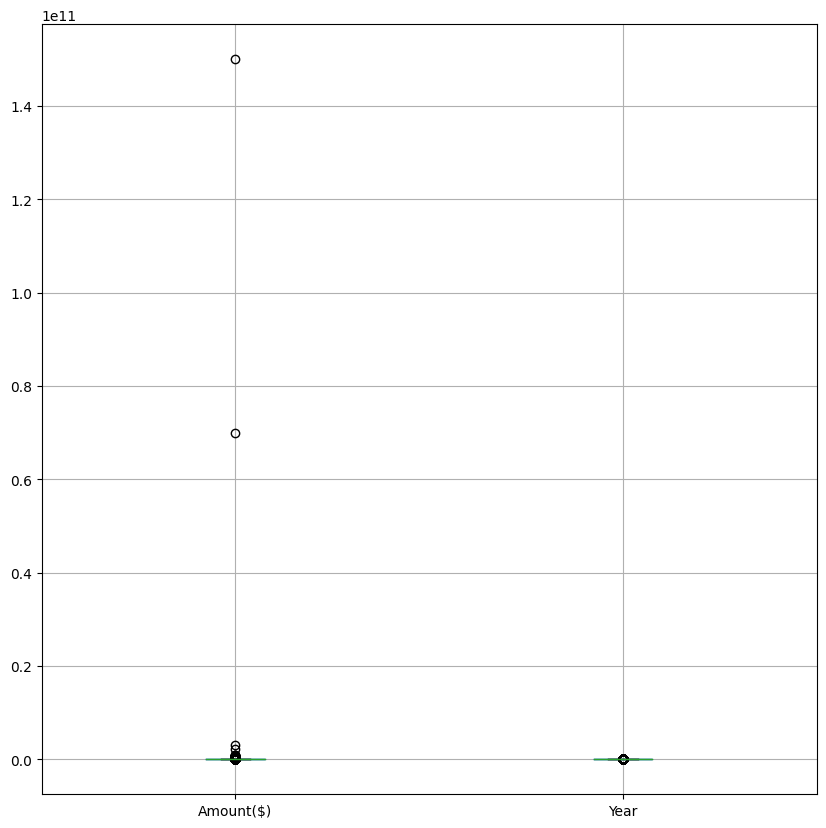

In [322]:
startup.boxplot(figsize=(10,10))
plt.show()

In [323]:
## we can see the outlier for the amount column is very huge

In [324]:
## for the amount column we will replace 0 with np.nan so it will be easier to impute mising values
startup["Amount($)"].replace(0,np.nan,inplace=True)

In [325]:
##check number of missing values
startup.isnull().sum()

Company/Brand      0
Sector            53
Amount($)        554
HeadQuarter      116
Year               0
Investor         621
dtype: int64

#### From our univariate analysis the following observation were made;
* Sector,HeadQuater,amount and investor coulmns had missing values.
* Due to the very high huge outlier recorded. The median value to fill in the missing values of the amount column

### Missing/NaN Values
##### There are missing values in the following columns:
* HeadQuarters
* Sector
* Amount
* Investor

### 1.Handling missing values in Amount column

In [326]:
#we create a variable to contain our amount column so it will be easier to impute the missing values
num_cols=["Amount($)"]

##### From our numerical visulation we realised our amount column has a huge outlier so it will be imputed with median since median is not sensitive to outliers

In [327]:
#Create the SimpleImputer object and fit it to the data
impute=SimpleImputer(strategy="median").fit(startup[num_cols])

In [328]:
# Transform the data to impute missing values
imputed_data = impute.transform(startup[num_cols])


In [329]:
# Convert the imputed data back to a DataFrame with the original columns
imputed_df = pd.DataFrame(imputed_data, columns=num_cols)


In [330]:
# Update the main dataframe with the imputed values
startup[num_cols] = imputed_df

In [331]:
#view amount column with imputed values
startup["Amount($)"]

0            250000.00
1            584699.00
2            950135.00
3           2000000.00
4           3000000.00
5           1600000.00
6            233879.00
7            730873.00
8           3000000.00
9           3000000.00
10          3000000.00
11          3000000.00
12          3000000.00
13          3000000.00
14          3000000.00
15          1461747.00
16           150000.00
17          1100000.00
18          3000000.00
19             7309.00
20          6000000.00
21           650000.00
22           511611.00
23           935518.00
24          3000000.00
25          3000000.00
26          2000000.00
27          2000000.00
28          2000000.00
29          3000000.00
30           292349.00
31          1000000.00
32          3000000.00
33           650000.00
34          1000000.00
35          5000000.00
36          4000000.00
37           438524.00
38          1000000.00
39          2800000.00
40          3000000.00
41           150000.00
42           584699.00
43         

In [332]:
##check number of missing values after imputing
startup["Amount($)"].isnull().sum()


0

In [333]:
#we wil view new summary statistics of only the amount column
amount_stats = startup['Amount($)'].describe()
print(amount_stats)

count           2856.00
mean        98493272.36
std       3097961207.48
min              877.00
25%          1000000.00
50%          3000000.00
75%          8000000.00
max     150000000000.00
Name: Amount($), dtype: float64


The 'Amount($)' column in the dataset provides information about the funding amounts in the Indian start-up ecosystem. The summary statistics indicate that the dataset consists of 2,856 data points. On average, the funding amount is approximately 98.5 million dollars, with a significant standard deviation of around 3.1 billion dollars, indicating a wide range of funding amounts.

The funding amounts range from a minimum of 877 dollars to a maximum of 150 billion dollars. The majority of the funding amounts are distributed between 1 million dollars (25th percentile) and 8 million dollars (75th percentile). The median funding amount is 3 million dollars, which indicates that half of the funding amounts in the dataset are below this value.

These summary statistics provide a glimpse into the funding trends and distribution in the Indian start-up ecosystem, showcasing the wide range of funding amounts and the presence of some significantly high funding values.

### 2.Handling Missing Values in Categorical Column namely Sector,HeadQuarter,Investor


In [334]:
### check number of missing values
miss_S=startup["Sector"].isnull().sum()
miss_I=startup["Investor"].isnull().sum()
miss_HQ=startup["HeadQuarter"].isnull().sum()

print(f"Sector:{miss_S} Investor:{miss_I} HeadQuarter:{miss_HQ}")


Sector:53 Investor:621 HeadQuarter:116


##### The Sector,Investor and HeadQuarter columns have 53,621 and 116 missing values respectively.The reason we are choosing not to impute the missing values in the columns with the mode is to not contanimate the dataset so we will replacing the missing values with Unknown



In [335]:
#replace the missing with unknown
startup["Sector"].fillna("Unknown",inplace=True)
startup["Investor"].fillna("Unknown",inplace=True)
startup["HeadQuarter"].fillna("Unknown",inplace=True)


In [336]:
### check number of missing values after replacing
startup["Sector"].isnull().sum()
startup["Investor"].isnull().sum()
startup["HeadQuarter"].isnull().sum()



0

### Hypothesis Testing
**Null Hypothesis (H0):** There are no significant differences in the funding amounts among the top 10 sectors.

**Alternative Hypothesis (H1):** There are significant differences in the funding amounts among the top 10 sectors.

To test the hypothesis, we will need to find out which sectors received the highest funding.

In [337]:
# Get the top 10 sectors based on funding amount
top_10_sectors = startup.groupby('Sector')['Amount($)'].sum().nlargest(10).index


In [338]:
# Print the top 10 Sectors
print("The Top 10 Sectors are: ")
print(top_10_sectors)


The Top 10 Sectors are: 
Index(['FinTech', 'Retail', 'EdTech', 'Tech', 'E-commerce', 'Automotive',
       'Multinational conglomerate company', 'Financial Services',
       'Food Delivery', 'Hospitality'],
      dtype='object', name='Sector')


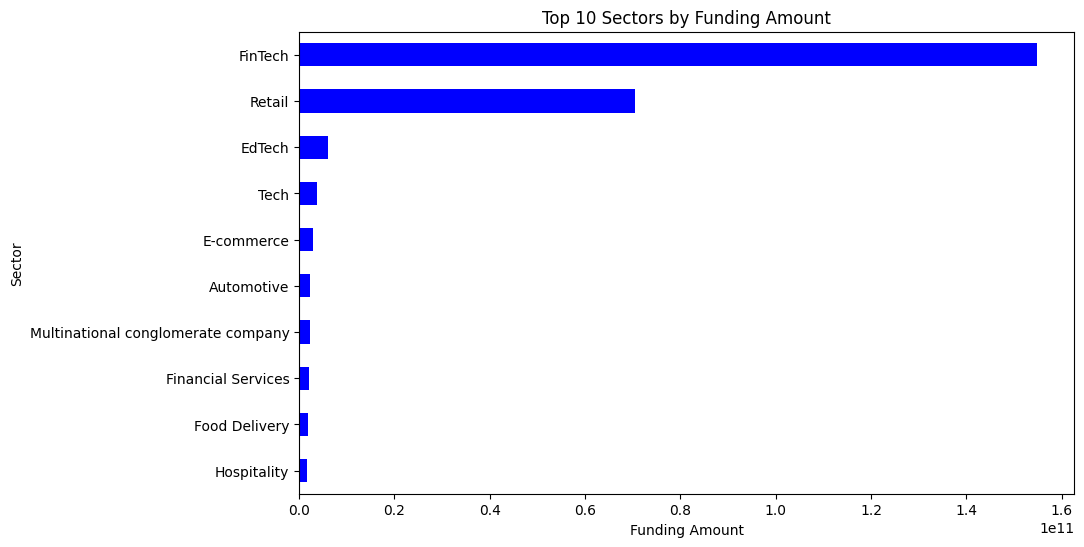

In [339]:
# Create a bar chart for the top 10 sectors
plt.figure(figsize=(10, 6))
sector_amounts = startup.groupby('Sector')['Amount($)'].sum().loc[top_10_sectors]
sector_amounts.sort_values().plot(kind='barh',color='blue')
plt.xlabel('Funding Amount')
plt.ylabel('Sector')
plt.title('Top 10 Sectors by Funding Amount')
plt.show()

These sectors represent the areas in which start-ups have received the highest funding amounts. The order of the sectors is determined by the total funding received in each sector, with FinTech being the sector that has received the highest funding amount, followed by Retail, EdTech, Tech, E-commerce, Automotive, Multinational conglomerate company, Financial Services, Food Delivery, and Hospitality.

This information provides insights into the sectors that have attracted significant investment in the Indian start-up ecosystem. It highlights the sectors that have shown promising growth potential and have gained the attention of investors. These sectors may offer attractive opportunities for entrepreneurs and investors looking to enter or invest in the Indian start-up market.

## Assumptions to be met
- **Normality**
- **Equal Variance**

-**Normality** refers to the assumption that the data follows a normal distribution. In a normal distribution, the data is symmetrically distributed around the mean, with the majority of the values clustering around the mean and fewer values towards the tails of the distribution. 

-**Equal variance**, also known as homogeneity of variance, refers to the assumption that the variability of the data is approximately the same across different groups or categories. In other words, it assumes that the spread of data is similar across the levels of a categorical variable or the groups being compared. 

Violations of these assumptions can impact the validity and reliability of the results obtained from these analyses. Therefore, it is essential to assess normality and equal variance to ensure the appropriateness of the chosen statistical methods.

## Normality Check

**Descriptive Statistics for all the top 10 sectors based on the funding amounts**

In [340]:
# Get the top 10 sectors based on funding amount
top_10_sectors = startup.groupby('Sector')['Amount($)'].sum().nlargest(10).index


In [341]:
# Create a dictionary to store the descriptive statistics for each sector
descriptive_stats = {}

# Calculate descriptive statistics for each sector
for sector in top_10_sectors:
    sector_data = startup[startup['Sector'] == sector]['Amount($)']
    mean = sector_data.mean()
    median = sector_data.median()
    std = sector_data.std()
    minimum = sector_data.min()
    maximum = sector_data.max()
    descriptive_stats[sector] = {'Mean': mean, 'Median': median, 'Standard Deviation': std, 'Minimum': minimum, 'Maximum': maximum}


In [342]:
# Print the descriptive statistics for each sector
for sector, stats in descriptive_stats.items():
    print(f"Descriptive Statistics for '{sector}' sector:")
    for stat, value in stats.items():
        print(f" - {stat}: {value:.2f}")
    print()

Descriptive Statistics for 'FinTech' sector:
 - Mean: 598033123.17
 - Median: 5000000.00
 - Standard Deviation: 9319536415.87
 - Minimum: 12700.00
 - Maximum: 150000000000.00

Descriptive Statistics for 'Retail' sector:
 - Mean: 2519617142.86
 - Median: 3500000.00
 - Standard Deviation: 13224990869.28
 - Minimum: 200000.00
 - Maximum: 70000000000.00

Descriptive Statistics for 'EdTech' sector:
 - Mean: 26654984.78
 - Median: 3000000.00
 - Standard Deviation: 83298016.76
 - Minimum: 12700.00
 - Maximum: 540000000.00

Descriptive Statistics for 'Tech' sector:
 - Mean: 71004016.67
 - Median: 3000000.00
 - Standard Deviation: 407958467.33
 - Minimum: 40900.00
 - Maximum: 3000000000.00

Descriptive Statistics for 'E-commerce' sector:
 - Mean: 31155904.17
 - Median: 3500000.00
 - Standard Deviation: 96147886.49
 - Minimum: 25000.00
 - Maximum: 800000000.00

Descriptive Statistics for 'Automotive' sector:
 - Mean: 42913078.81
 - Median: 3000000.00
 - Standard Deviation: 85688715.38
 - Minimum

-**Observations**

There is a significant difference between the mean and median for FinTech(which indicate that the data is skewed or not symmetric), along with the large standard deviation and the presence of outliers, indicates potential deviations from normality. Further analysis, such as formal statistical tests for normality, would be required to confirm the distribution characteristics.
The same applies to Retail sector, EdTech, Tech, E-commerce, Automative sector, Financial Services, Food delivery and Hospitality Sector. 

The mean funding amount for the 'Multinational conglomerate company' sector is 2,200,000,000.00, and the median is also 2,200,000,000.00. Since the mean and median are equal, it suggests that the data is symmetric and not skewed. The standard deviation is reported as NaN. This occurs when there is no variability in the data or when all the values are the same. In this case, the standard deviation is undefined, likely because there is only one data point available for the 'Multinational conglomerate company' sector. The minimum and maximum funding amounts are both 2,200,000,000.00, indicating that there is no variability in the data. This further supports the absence of standard deviation.

However, with only one data point available, it is not possible to determine the distribution characteristics or make any definitive conclusions about the normality of the data.

**Visual inspection:** 
We create a histogram to visually inspect the distribution of funding amounts for the sector.
Look for bell-shaped distributions that resemble a normal distribution.

In [343]:
# Filter the dataframe to include only the top 10 sectors
startup_top_10 = startup[startup['Sector'].isin(top_10_sectors)]

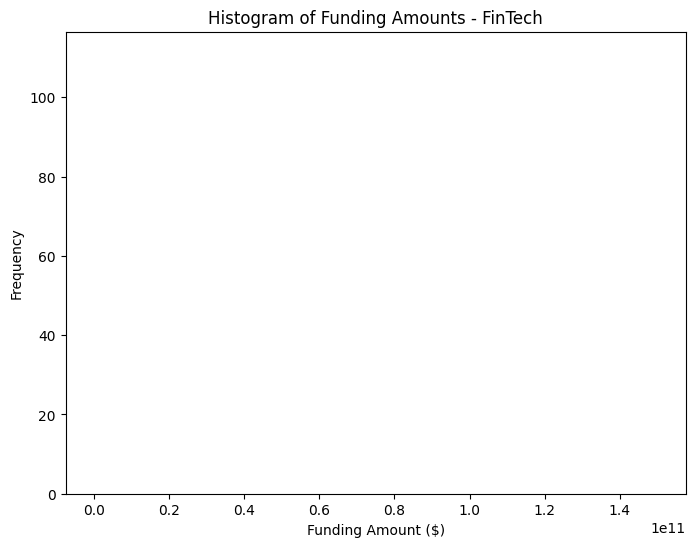

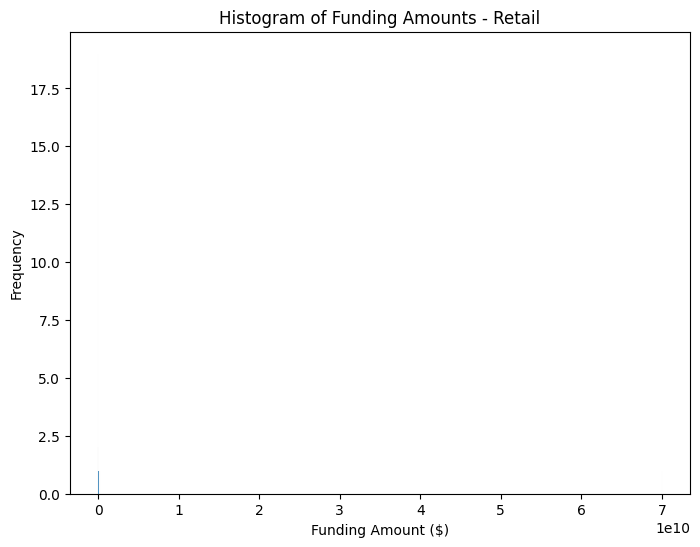

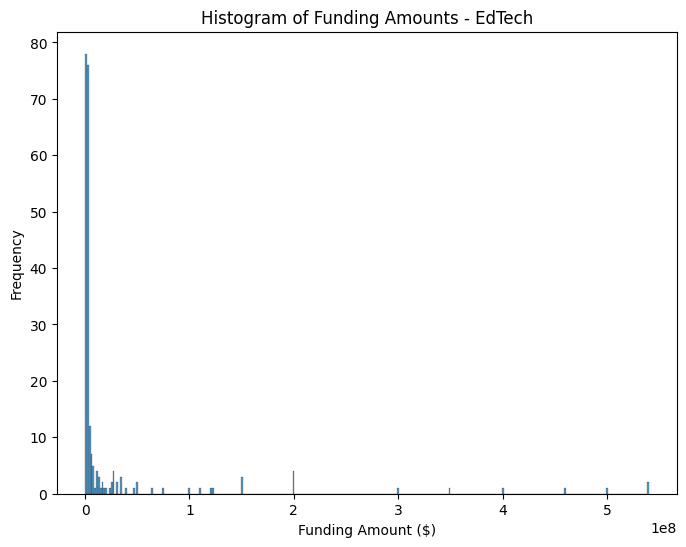

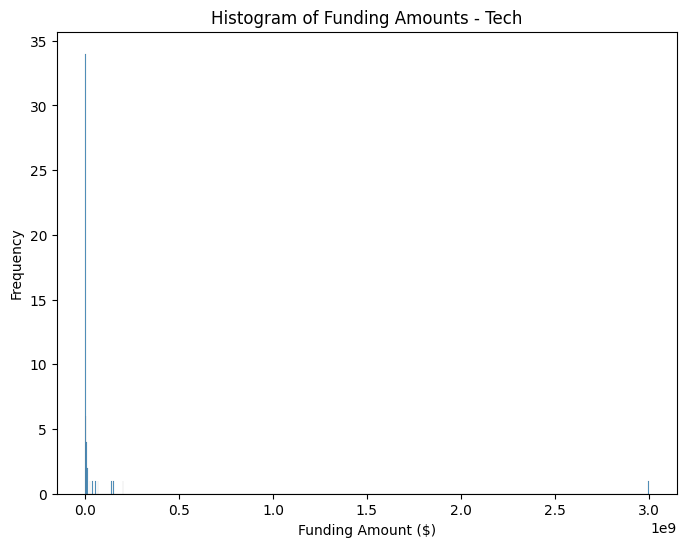

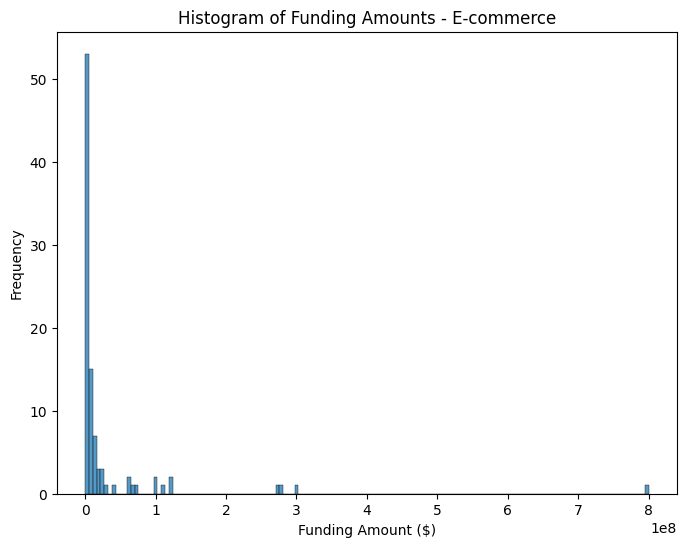

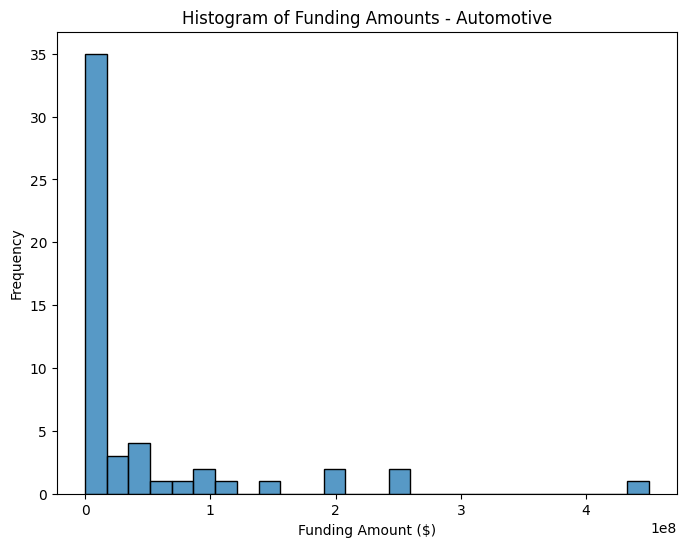

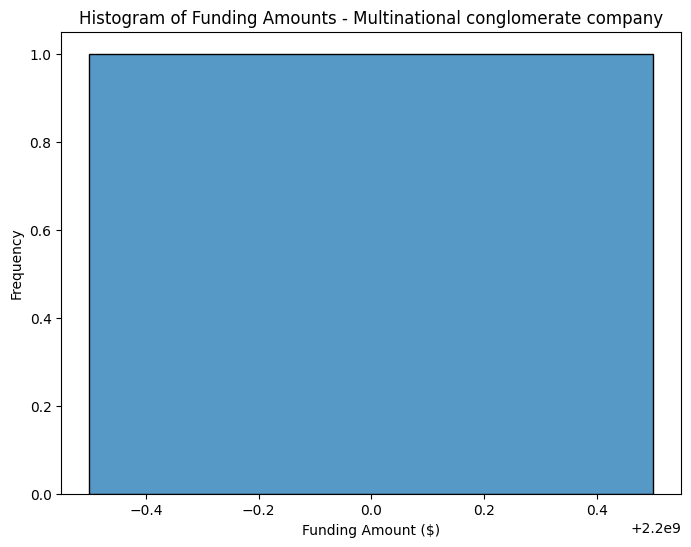

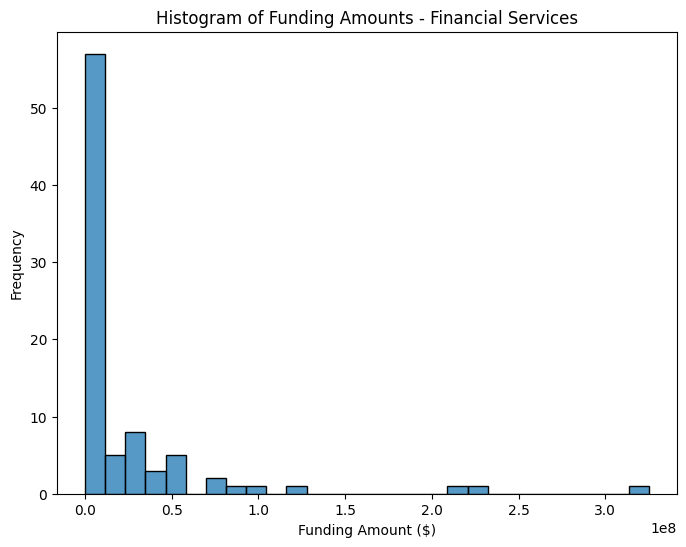

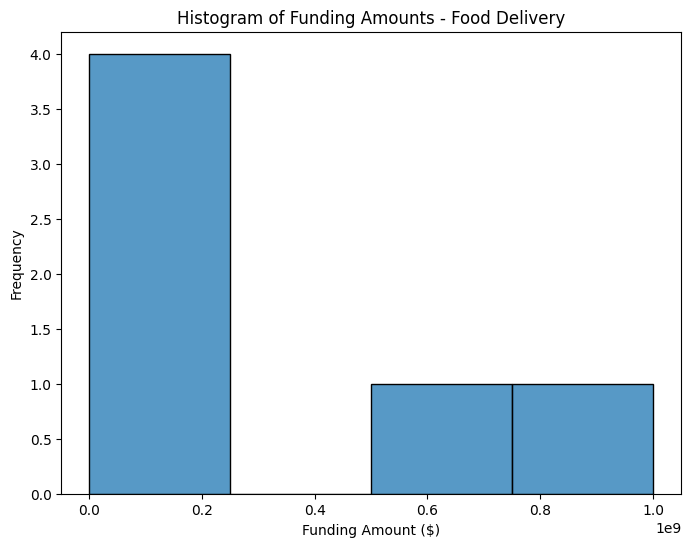

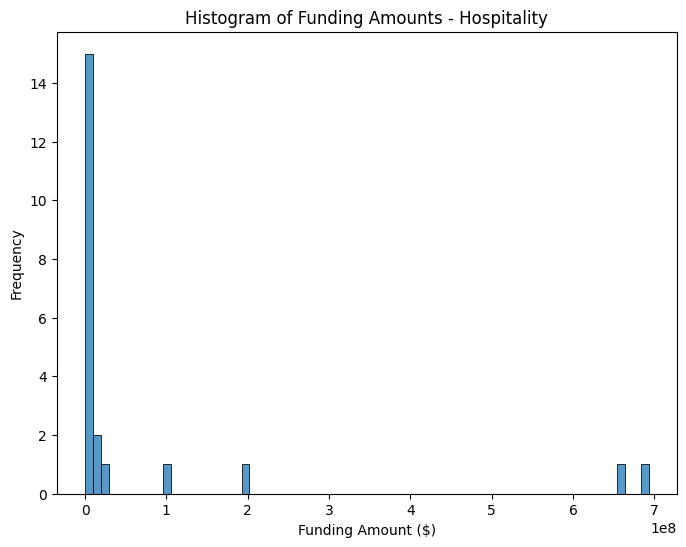

In [344]:
# Check normality assumption for each sector
for sector in top_10_sectors:
    sector_data = startup_top_10[startup_top_10['Sector'] == sector]['Amount($)']
    
    # Visual inspection: Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(data=sector_data)
    plt.xlabel('Funding Amount ($)')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Funding Amounts - {sector}')
    plt.show()

From the charts above, we can see that the charts do not have the bell shape, indicating that the distributions are not normal. To gain more insights into whether the data for each sector approximately follows a normal distribution we have to run a Quantitative Test(Shapiro-Wilk test, Anderson-Darling test, and Kolmogorov-Smirnov test)

**Quantitative Test using Shapiro-Wilk test**

The **Shapiro-Wilk test** is a statistical test used to assess whether a given data sample is likely to come from a normally distributed population. It is a commonly used test for checking the normality assumption of a dataset. 
This test generate a test statistic and a p-value. A p-value greater than the chosen significance level (e.g., 0.05) indicates that the data can be considered normally distributed.

In [345]:
# Check normality assumption for each sector
for sector in top_10_sectors:
    sector_data = startup_top_10[startup_top_10['Sector'] == sector]['Amount($)']
    
    # Check if sector has at least 3 data points
    if len(sector_data) >= 3:
        # Quantitative test: Shapiro-Wilk test
        statistic, p_value = shapiro(sector_data)
        print(f'Shapiro-Wilk test for {sector}:')
        print(f'  - Test statistic: {statistic:.4f}')
        print(f'  - p-value: {p_value:.4f}\n')
    else:
        print(f'{sector} has fewer than 3 data points. Shapiro-Wilk test not performed.\n')

Shapiro-Wilk test for FinTech:
  - Test statistic: 0.0371
  - p-value: 0.0000

Shapiro-Wilk test for Retail:
  - Test statistic: 0.1900
  - p-value: 0.0000

Shapiro-Wilk test for EdTech:
  - Test statistic: 0.3406
  - p-value: 0.0000

Shapiro-Wilk test for Tech:
  - Test statistic: 0.1575
  - p-value: 0.0000

Shapiro-Wilk test for E-commerce:
  - Test statistic: 0.3295
  - p-value: 0.0000

Shapiro-Wilk test for Automotive:
  - Test statistic: 0.5610
  - p-value: 0.0000

Multinational conglomerate company has fewer than 3 data points. Shapiro-Wilk test not performed.

Shapiro-Wilk test for Financial Services:
  - Test statistic: 0.4956
  - p-value: 0.0000

Shapiro-Wilk test for Food Delivery:
  - Test statistic: 0.8001
  - p-value: 0.0589

Shapiro-Wilk test for Hospitality:
  - Test statistic: 0.4462
  - p-value: 0.0000



The **test statistic** is a numerical value that measures the deviation from normality. In this case, the test statistic is 0.4462.

The **p-value** is a measure of evidence against the null hypothesis, which states that the data is normally distributed. A lower p-value indicates stronger evidence against the null hypothesis, suggesting that the data significantly deviates from a normal distribution. In this case, the p-value is 0.0000, which is less than any conventional significance level (e.g., 0.05).

Therefore, based on the results of the Shapiro-Wilk test, we can conclude that the funding amount data for FinTech, Retail, EdTech, Tech, E-commerce, Automotive, Financial Service and Hospitality sector do not follow a normal distribution. They have extremely low p-value suggesting a significant departure from normality, indicating that the distributions are not normally distributed.

The p-value for Food delivery is 0.0589 which is greater than the significant value of 0.05, indicating that data significantly does not deviate from a normal distribution. We therefore conclude that the distribution for Food delivery is normally distributed.

In the case where a sector has fewer than 3 data points, such as the "Multinational conglomerate company" sector, it is not possible to perform a meaningful statistical test for normality. It is important to acknowledge the limitation due to insufficient data points. This indicates that further analysis or interpretation of normality for that specific sector is not feasible with the available data.

However, we still performed visual inspection and explore descriptive statistics (e.g., mean, median, skewness) to gain insights into the distribution of funding amounts for the "Multinational conglomerate company" sector.

**Equal Variance Test using Levene's test to test for equal variance across different sectors**

**Levene's test** for equal variance is a statistical test used to determine if the variances of two or more groups are equal. It is used when the assumption of equal variances (homogeneity of variances) needs to be checked, typically in the context of analysis of variance (ANOVA) or other parametric tests.

In [346]:
# Get the top 10 sectors based on funding amount
top_10_sectors = startup.groupby('Sector')['Amount($)'].sum().nlargest(10).index


In [347]:

# Create a dictionary to store the funding amounts for each sector
data_by_sector = {}

# Populate the dictionary with funding amounts for each sector
for sector in top_10_sectors:
    sector_data = startup_top_10[startup_top_10['Sector'] == sector]['Amount($)']
    data_by_sector[sector] = sector_data


In [348]:
# Perform Levene's test for equal variance
statistic, p_value = levene(*data_by_sector.values())

print("Levene's test for equal variance:")
print(f" - Test statistic: {statistic:.4f}")
print(f" - p-value: {p_value:.4f}")



Levene's test for equal variance:
 - Test statistic: 0.6689
 - p-value: 0.7376


The **test statistic** measures the magnitude of the difference in variances among the sectors which is 0.6689.
The **p-value** is a measure of evidence against the null hypothesis, which states that the variances across the sectors are equal. A higher p-value suggests weak evidence against the null hypothesis, indicating that the differences in variances among the sectors are not statistically significant.

The p-value is 0.7376, which is greater than the typical significance level of 0.05. Therefore, we fail to reject the null hypothesis and conclude that there is no significant difference in the variances of funding amounts across the top 10 sectors. This supports the assumption of equal variance among the sectors.

If the normality assumption is not met, but the assumption of equal variance is met, you can use the Kruskal-Wallis test instead of ANOVA. 
The Kruskal-Wallis test is a non-parametric alternative to ANOVA and is appropriate when the data do not meet the assumption of normality.

- **Kruskal-Wallis test**

The Kruskal-Wallis test assesses whether there are significant differences in the medians of the groups being compared, without assuming a specific distribution. It is robust to violations of the normality assumption and can be used when the data are skewed or have outliers.

The Kruskal-Wallis test compares the medians of the groups rather than the means. It is a non-parametric test that does not assume a specific distribution of the data, making it suitable for situations where the data may not follow a normal distribution.

In [349]:
# Get the top 10 sectors based on funding amount
top_10_sectors = startup.groupby('Sector')['Amount($)'].sum().nlargest(10).index


In [350]:

# Filter the dataframe to include only the top 10 sectors
startup_top_10 = startup[startup['Sector'].isin(top_10_sectors)]


In [351]:

# Create a list to store the funding amounts for each sector
data_by_sector = []

# Populate the list with funding amounts for each sector
for sector in top_10_sectors:
    sector_data = startup_top_10[startup_top_10['Sector'] == sector]['Amount($)']
    data_by_sector.append(sector_data)


In [352]:

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*data_by_sector)

print("Kruskal-Wallis test for the top 10 sectors:")
print(f" - Test statistic: {statistic:.4f}")
print(f" - p-value: {p_value:.4f}")



Kruskal-Wallis test for the top 10 sectors:
 - Test statistic: 30.0738
 - p-value: 0.0004


The result of the test statistic is 30.0738 which measures the magnitude of the differences in the medians of the funding amounts among the sectors. The p-value is 0.0004, which is less than the typical significance level of 0.05. Therefore, we reject the null hypothesis and conclude that there are significant differences in the medians of the funding amounts among the top 10 sectors.

**Conclusion**

The results of the Kruskal-Wallis test indicate that there is statistical evidence to suggest significant differences in the funding amounts across the top 10 sectors.

## Bivariate Analysis

### Questions


**a) What are the overall funding trends in the Indian start-up ecosystem during the analyzed period?**

In [353]:
#we will covert year to str so it will easily to visualise
startup["Year"]=startup["Year"].astype(str)

In [354]:
# Calculate total funding amount for each year
funding_trends = startup.groupby('Year')['Amount($)'].sum()


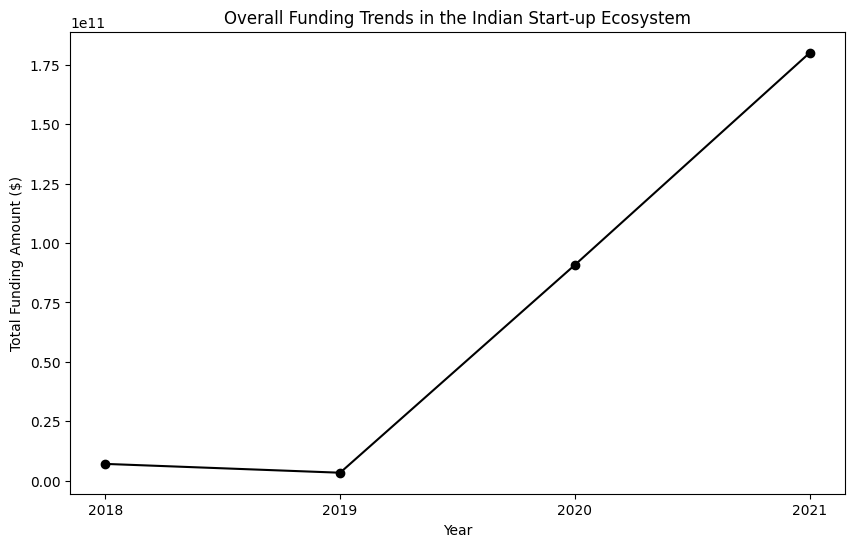

In [355]:
# Plot the funding trends
plt.figure(figsize=(10, 6))
plt.plot(funding_trends.index, funding_trends.values, marker='o',color='black')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount ($)')
plt.title('Overall Funding Trends in the Indian Start-up Ecosystem')
plt.show()

The trend direction dropped slightly in 2018 indicating a negative trend of decreasing funding amounts during that year. However, the shift changed from 2019 through to 2021. The trend predominately shot up indicating increasing funding amounts over the period.It means that there was significant funding growth during this period.
This upward trend suggests a period of substantial funding growth and indicates a positive outlook for the Indian start-up ecosystem during that time.

**b)What are the top 10 companies/brands in the startup ecosystem based on the highest funding amounts received?**

In [356]:
# Get the top 10 amounts in the startup ecosystem
top_10_amounts = startup.nlargest(10, 'Amount($)')
print(top_10_amounts[['Company/Brand', 'Amount($)']])


                     Company/Brand       Amount($)
1739               Alteria Capital 150000000000.00
892   Reliance Retail Ventures Ltd  70000000000.00
929                      Snowflake   3000000000.00
940                       Reliance   2200000000.00
101                         Swiggy   1000000000.00
1993              VerSe Innovation   1000000000.00
2582                  Dream Sports    840000000.00
914       Reliance Retail Ventures    800000000.00
1719                        Swiggy    800000000.00
90                        SBI Life    742000000.00


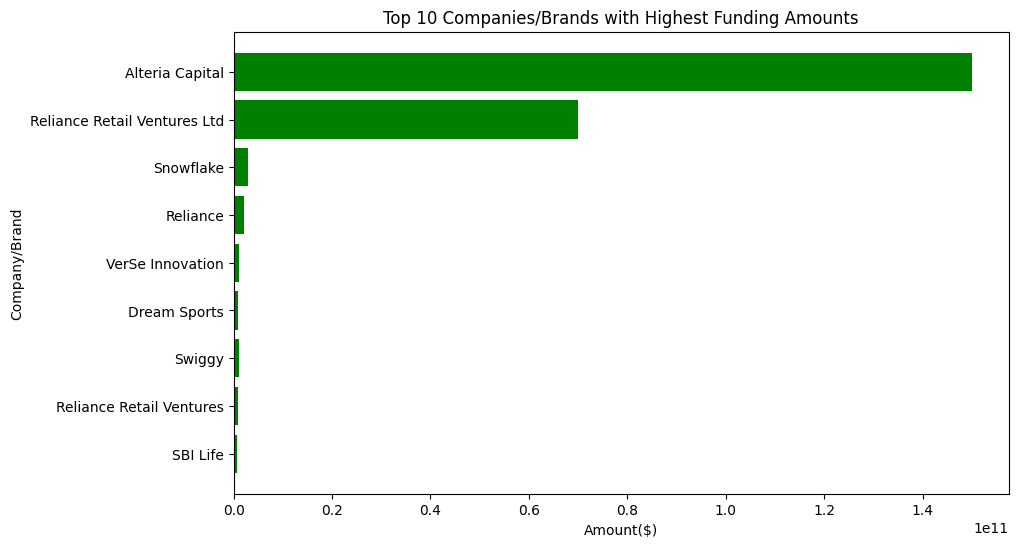

In [357]:
# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
top_10_amounts_sorted = top_10_amounts.sort_values(by='Amount($)', ascending=True)
plt.barh(top_10_amounts_sorted['Company/Brand'], top_10_amounts_sorted['Amount($)'],color='green')
plt.xlabel('Amount($)')
plt.ylabel('Company/Brand')
plt.title('Top 10 Companies/Brands with Highest Funding Amounts')
plt.show()

Alteria Capital secured the highest funding amount of 150 billion dollars, making it the leading company in terms of funding. Reliance Retail Ventures Ltd follows closely behind with a funding amount of 70 billion dollars.
Snowflake secured the third-highest funding with 3 billion dollars. Reliance, with 2.2 billion dollars in funding, takes the fourth position. Swiggy and VerSe Innovation both secured 1 billion dollars in funding, placing them in the fifth and sixth positions, respectively. Dream Sports received funding of 840 million dollars, ranking seventh.
Reliance Retail Ventures secured another spot in the top 10 with 800 million dollars in funding. Swiggy also appears again in the list, matching the funding amount of 800 million dollars. SBI Life closes the top 10 with funding of 742 million dollars.

**Conclusion**   

These funding amounts represent significant investments in these companies/brands, indicating their potential for growth and success in the startup ecosystem.


**c) Which sectors attracted the most funding and experienced the highest growth?**

In [358]:
# Calculate total funding amount for each sector
funding_by_sector = startup.groupby('Sector')['Amount($)'].sum()


In [359]:

# Calculate growth rate for each sector
first_year_funding = startup[startup['Year'] == startup['Year'].min()].groupby('Sector')['Amount($)'].sum()
last_year_funding = startup[startup['Year'] == startup['Year'].max()].groupby('Sector')['Amount($)'].sum()
growth_rate = ((last_year_funding - first_year_funding) / first_year_funding) * 100


In [360]:

# Sort sectors by total funding in descending order
sorted_by_funding = funding_by_sector.sort_values(ascending=False)

# Sort sectors by growth rate in descending order
sorted_by_growth = growth_rate.sort_values(ascending=False)


In [361]:

# Print the sectors with the highest funding
print("Sectors with the highest funding:")
print(sorted_by_funding.head())

# Print the sectors with the highest growth
print("Sectors with the highest growth:")
print(sorted_by_growth.head())


Sectors with the highest funding:
Sector
FinTech      154890578900.00
Retail        70549280000.00
EdTech         6050681544.00
Tech           3834216900.00
E-commerce     2990966800.00
Name: Amount($), dtype: float64
Sectors with the highest growth:
Sector
FinTech        867229.43
Sports          24526.92
Social Media    18000.00
Gaming          13810.00
Dating          12425.00
Name: Amount($), dtype: float64


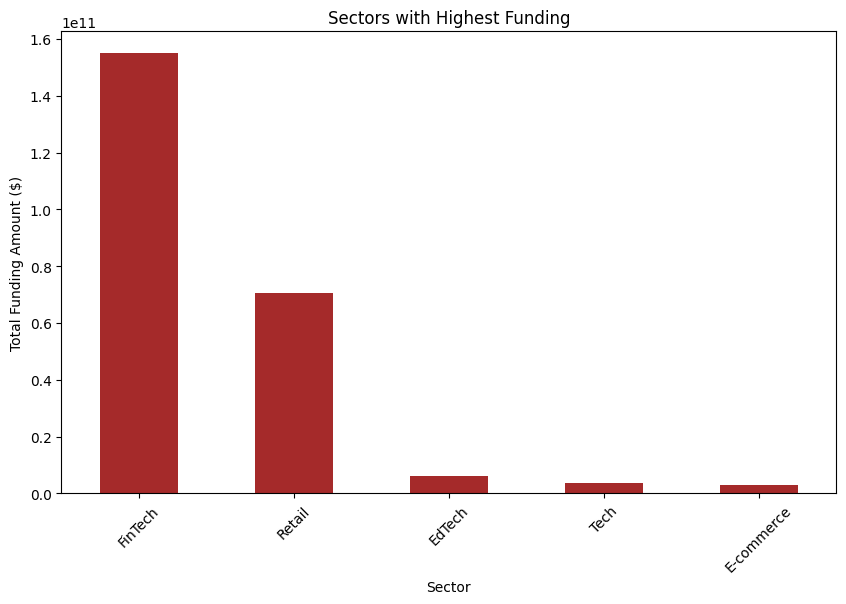

In [362]:
# Plot bar chart for sectors with highest funding
plt.figure(figsize=(10, 6))
sorted_by_funding.head().plot(kind='bar', color='brown')
plt.xlabel('Sector')
plt.ylabel('Total Funding Amount ($)')
plt.title('Sectors with Highest Funding')
plt.xticks(rotation=45)

plt.show()


**Sectors with the highest funding**

With a total funding amount of 154.89 billion dollars, FinTech sector attracted the highest funding during the analyzed period. The Retail sector secured the second-highest funding with a total amount of 70.55 billion dollars. EdTech sector received substantial funding amounting to 6.05 billion dollars, placing it in the third position. Tech sector obtained funding of 3.83 billion dollars, showing significant investment in this sector. E-commerce sector attracted considerable funding with a total amount of 2.99 billion dollars.

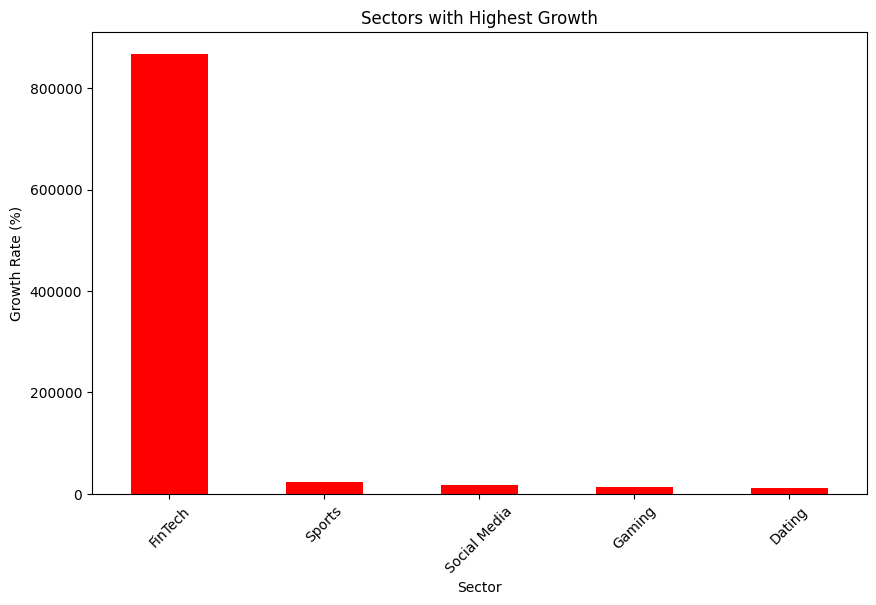

In [363]:

# Plot bar chart for sectors with highest growth
plt.figure(figsize=(10, 6))
sorted_by_growth.head().plot(kind='bar', color='red')
plt.xlabel('Sector')
plt.ylabel('Growth Rate (%)')
plt.title('Sectors with Highest Growth')
plt.xticks(rotation=45)
plt.show()


**Sectors with the highest growth**

FinTech sector exhibited remarkable growth with a growth rate of approximately 867,229.43%. This indicates a substantial increase in funding compared to the initial amount. The Sports sector experienced significant growth with a growth rate of approximately 24,526.92%.Social Media sector achieved substantial growth with a growth rate of 18,000%.The Gaming sector showed notable growth with a growth rate of 13,810%. The Dating sector experienced significant growth with a growth rate of 12,425%.

**Conclusion**

FinTech sector not only attracted the highest funding but also experienced substantial growth during the analyzed period. The Retail sector also secured a significant amount of funding, while other sectors like EdTech, Tech, and E-commerce demonstrated noteworthy investment. Additionally, sectors such as Sports, Social Media, Gaming, and Dating showed significant growth rates, suggesting emerging opportunities and investor interest in these sectors.

**d) Who are the top 10 investors in the Indian start-up ecosystem?**

In [364]:
#we will exclude the unknown column
excluded_group = 'Unknown'
filtered_data = startup[startup['Investor'] != excluded_group]


In [365]:
# Group the filtered_data by investors and calculate the total funding amount
investor_funding = filtered_data.groupby('Investor')['Amount($)'].sum()

# Sort the investors based on total funding amount in descending order and select the top 10
top_investors = investor_funding.sort_values(ascending=False).head(10)


In [366]:
# Print the top 10 investors
print("Top 10 Investors in the Indian Start-up Ecosystem:")
print(top_investors)


Top 10 Investors in the Indian Start-up Ecosystem:
Investor
Silver Lake, Mubadala Investment Company                             70000000000.00
Salesforce Ventures, Dragoneer Investment Group                       3000000000.00
Facebook, Google, KKR, Silver Lake                                    2200000000.00
Tiger Global                                                          1417000000.00
Canaan Valley Capital, Glade Brook Capital Partners                   1000000000.00
Falcon Edge, DST Global, D1 Capital, Redbird Capital, Tiger Global     840000000.00
Carmignac, Falcon Edge Capital                                         800000000.00
General Atlantic, Kohlberg Kravis Roberts                              800000000.00
Kora, Tiger Global Management                                          712000000.00
Flipkart                                                               700000000.00
Name: Amount($), dtype: float64


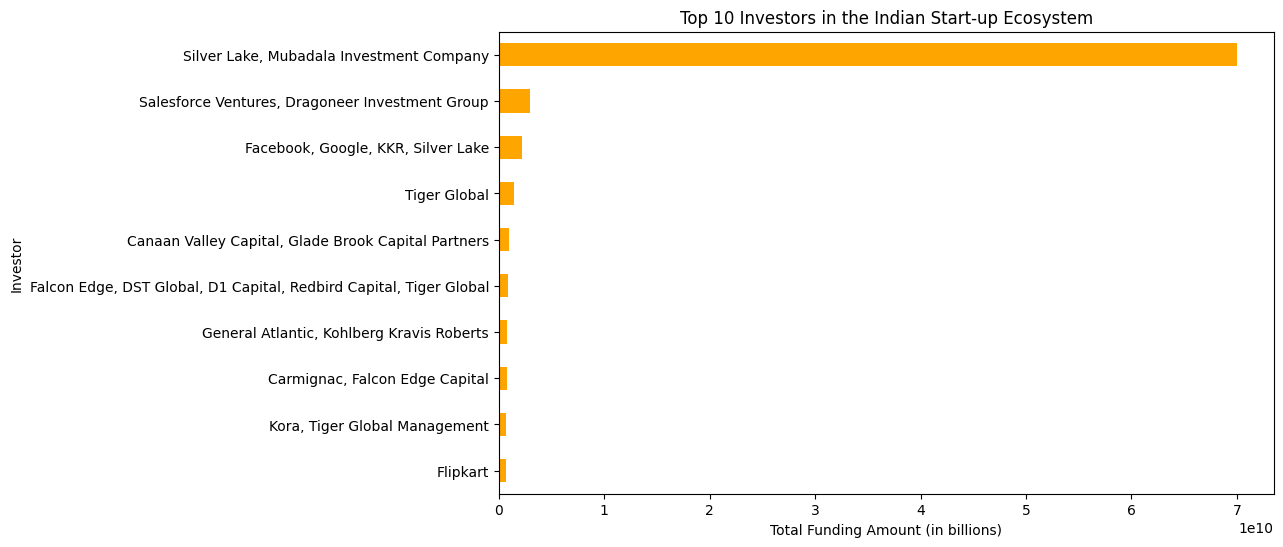

In [367]:
# Create a horizontal bar plot of the top 10 investors
plt.figure(figsize=(10, 6))
top_investors.sort_values().plot(kind='barh',color='orange')
plt.title('Top 10 Investors in the Indian Start-up Ecosystem')
plt.xlabel('Total Funding Amount (in billions)')
plt.ylabel('Investor')
plt.show()



Silver Lake,Mubadala Investment Company has the highest total funding amount, indicating a significant contribution to the start-up ecosystem.This investor's funding amount surpasses all others by a large margin. Notable investors such as Salesforce Ventures,Dragoneer Investment Group which is the second highest also hold substantial funding amounts.

The list of top investors includes a mix of well-known companies and investment firms such as Facebook, Google, KKR, and Silver Lake, highlighting their active participation in funding Indian start-ups. This diversity suggests a broad range of expertise and resources being brought into the ecosystem.

The funding amounts of the top 10 investors vary significantly, ranging from billions of dollars to hundreds of millions of dollars. This indicates that different investors have varying levels of involvement and financial commitments in supporting start-ups in India.

The presence of prominent investors in the top 10 list signifies a high level of confidence and belief in the potential of Indian start-ups. These investors' financial backing suggests that they see promising opportunities for growth and innovation within the Indian entrepreneurial landscape.



**Conclusion**

There is a strong financial support provided by a diverse group of investors to the Indian start-up ecosystem. Their investments not only provide capital but also bring expertise, resources, and networks that can contribute to the success and development of start-ups in India.

**e) Which Top 10 cities have attracted the highest total funding amounts for start-ups?**

In [368]:
excluded_group = 'Unknown'
filtered_data = startup[startup['HeadQuarter'] != excluded_group]


In [369]:
# Group the data by headquarters city and calculate the sum of funding amounts
city_funding = filtered_data.groupby('HeadQuarter')['Amount($)'].sum()


In [370]:

# select the top 10 cities
top_10_cities = city_funding.nlargest(10)


In [371]:

# Print the top 10 cities and their corresponding funding amounts
print("Top 10 cities with the highest total funding amount:")
print(top_10_cities)


Top 10 cities with the highest total funding amount:
HeadQuarter
Mumbai       230965775758.00
Bengaluru     24652625356.00
Gurugram       7071381628.00
New Delhi      3562785985.00
California     3081300000.00
Pune           1482953004.00
Chennai        1162978635.00
Haryana         937345054.00
Delhi           917334975.00
Noida           656889227.00
Name: Amount($), dtype: float64


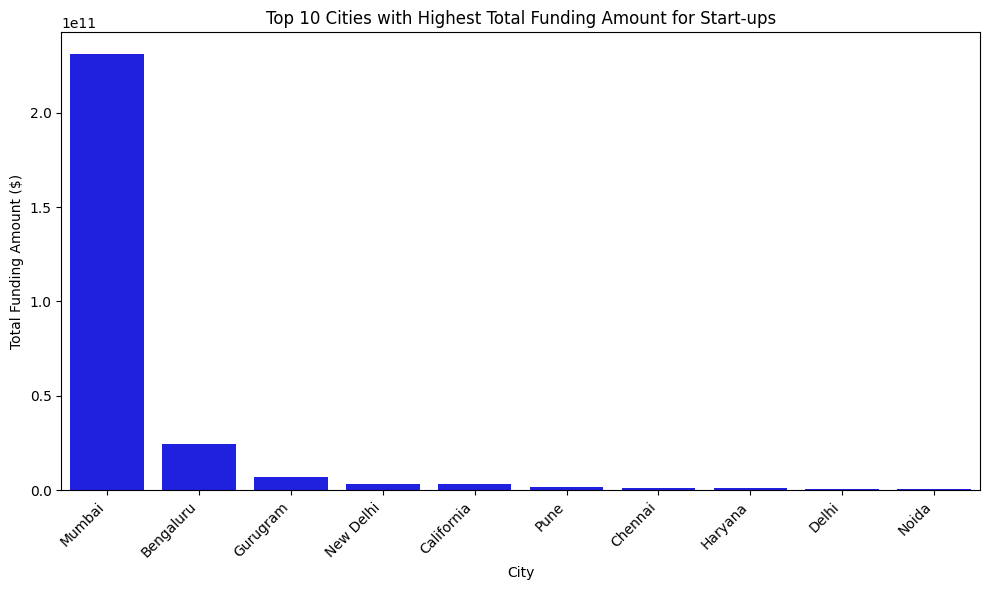

In [372]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cities.index, y=top_10_cities.values, color='blue')
plt.xlabel('City')
plt.ylabel('Total Funding Amount ($)')
plt.title('Top 10 Cities with Highest Total Funding Amount for Start-ups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The top city with the highest total funding amount for start-ups is Mumbai, with a staggering amount of 230,965,800,000 dollars. This indicates a significant level of investment in the start-up ecosystem in Mumbai. Bengaluru follows closely behind with a total funding amount of 24,652,630,000 dollars. It is evident that both Mumbai and Bengaluru have emerged as major hubs for start-up funding in India.
Other cities in the top 10 list include Gurugram, New Delhi, California, Pune, Chennai, Haryana, and Delhi. These cities have also attracted substantial funding amounts, demonstrating the diverse geographical distribution of start-up funding in India.

**Conclusion**

These findings highlight the concentration of funding in certain cities, reflecting the presence of a vibrant start-up ecosystem and the attractiveness of these cities for investors.

**f)Has there been any change in the distribution of headquarters locations over the analyzed period?**

In [373]:
# Create a pivot table of count of start-ups by headquarters location and year
pivot_table = startup.pivot_table(index='HeadQuarter', columns='Year', aggfunc='size', fill_value=0)


In [374]:

# Sort the pivot table by the total funding amount for each headquarters location
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table = pivot_table.sort_values('Total', ascending=False)


In [375]:

# Select the top 10 headquarters locations with the highest total funding amount
top_10_locations = pivot_table.head(10)


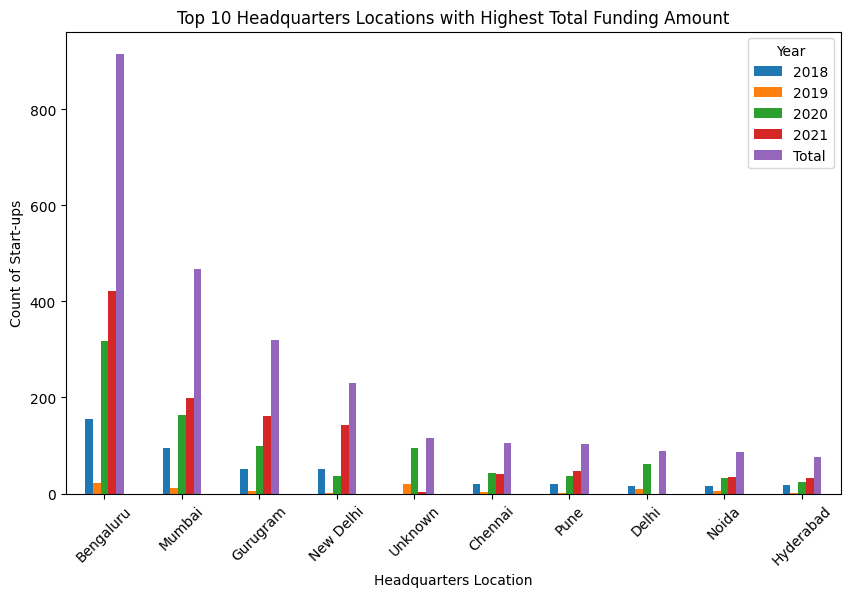

In [376]:

# Plot a bar chart to visualize the distribution of headquarters locations over the analyzed period
top_10_locations.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Headquarters Locations with Highest Total Funding Amount')
plt.xlabel('Headquarters Location')
plt.ylabel('Count of Start-ups')
plt.xticks(rotation=45)
plt.show()


Bengaluru emerged to be the headquarters with the highest total funding amount followed by Mumbai, Gurugram and the rest. In 2021, Bengaluru had the highest total funding amount. This was followed by 2020, 2018 and 2019 respectively. The total funding amount Bengaluru is very significant as compared to the total funding amount of the other headquarters.